<p style="font-family: Arial; font-size:3em;color:#2462C0; font-style:bold"><br>Findings Report - Infrared spectroscopy</p>

_________________________________________________________________________________________________________________________

* **Target Body**: Moon
* **Region of Interest**: Mare Imbrium
* **Mission**: Chandrayaan-1
* **Instrument**: M3 - Hyperspectral Imager
* **Pre processing**: Data processed by S. Besse as described in S. Besse et al, 2012, A visible and near-infrared photometric correction for Moon Mineralogy Mapper (M3), Icarus 222 (2013) 229–242.

_________________________________________________________________________________________________________________________
<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>Objective:</p>

This notebook aims to achieve a statistical exploration of the VIS/NIR data obtained by the M3 hyperspectral imager onboarded on the Chandrayaan-1 spacecraft. In particular, the analyis is focused on on Mare Imbrium for which data quality is the best (good sunlight phase angle and optimal temperature of the instrument ensured better recording of incoming photons). The analysis uses data collected by the instrument while in global mode hence generating spectral information spanning 85 spectral bands.The goal of the statistical analysis is to find mineralogical comonalities and/or differences among different volcanic units that constitutes Mare Ibrium as presented in F. Thiessen, S. Besse et al, 2014, Mapping lunar mare basalt units in mare Imbrium as observed with the Moon Mineralogy Mapper (M3), Planetary and Space Science 104 (2014) 244–252.
_________________________________________________________________________________________________________________________
<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>Products:</p>

* Delivery of a **repeatable solution** to process hyperspectral imagery datacubes and achieve a large scale pixel analysis to assess **mineral composition of an airless planetary body**
* Critically, the solution enables the **dual use** of a **qualitative approach** through geomorpholocical identification with traditional GIS tools (defining geological unit) **as well as a quantitative approach** through the use of quantitative methods in Python (spectral processing, statistical and machine learning libraries).
* Unfortunately shortcommings have prevented us to achieve a full analysis of the region of interest. However we beleive that the detailed workflow proposed below is thorough enough to enable further research on the topic by another analyst.


_________________________________________________________________________________________________________________________
<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>Shortcommings:</p>

* Analyst's limited ability to employ further machine learning techniques than the one presented **(knowledge gap)**
* Analyst's inability to use OOP techniques and limited Python coding skills could have weighted on execution speed **(knowledge gap)**
* Analyst's limited knowledge of MongoDB **(knowledge gap**)
* Analyst's uncertainity in optimal choice of data structure for fast and efficient database inserts and queries **(design issue)**
* Processing power of the machine used for analysis - this implies that many functions from usefull libraries like spectral python could not be used directly on the data set(PCA, K-Means etc) due to length of computations. Even our replacemement methodology which relied on MongoDB took significant amount of processing time especially for pixel per pixel extraction. **(infrastructure constrain)**
* Uninvestigated issues of continuum removal as well as OLS fitting during the pixel extraction script and which has led to a 40% shrink in our sample size. (**time constrain**)
* Network access restricted to Eduroam / ESA Public restricted access to ports of several software packages. To counteract this we used our private internet connection at home which unfortunately led in implementation delay as well as "unexplored avenues" given some  of the work and testing could only be achieved at home. (**infrastructure/time constrain**)
_________________________________________________________________________________________________________________________

<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>Recommandations for the future:</p>

* **1. Avoid using PyMongo for database inserts and querries**
* **2. Avoid inserting arrays in MongoDB, prefer inserting single values, this makes the querrying process faster**

**In conclusion:** Use Monary for inserting and querrying which an extremely fast and efficient library although more complex to use than PyMongo. The easiest way is to create a dedicated collection for series/arrays with one document per value. In its current form querries on arrays in the database are quite slow and require heavy parsing when returned. (Although the length of the process might be a result of our low computing power). Limiting arrays and use of PyMongo and investing time in using Monary is strongly recommendedand should lead to fast querrying and inserting. Unfortunately due to time constrains we havent proposed a new data structure organised arround Monary.

_________________________________________________________________________________________________________________________

<p style="font-family: Arial; font-size:3em;color:#2462C0; font-style:bold"><br>Table of contents:</p>

* **1. Required files and folders**
* **2. Instrument presentation**
* **3. Data acquisition and Data Type**
* **4. Softwares Required for Analysis**
* **5. Setting up Python Environement**
* **6. Required Python libraries for analysis** 
* **7. Loading up the data**
* **8. Band analysis example**
* **9. Process Walkthrough: The one pixel example**
* **10. No-SQL Database installation: MongoDB**
* **11. Process Walkthrough: Multiple pixels example**
* **12. Spectral database construction**
* **13. QGIS interaction**
* **14. Hardware & Infrastructure specifications**

<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>1. Required files and folders</p>

**Main Directory**

In [1]:
import os # Imports the OS library which allows the noteboox to interact with the Unix shell
!ls

1~README~1.txt		   m3_Imbrium_Analysis.ipynb.invalid  Shapefiles
Data			   Papers			      Spectral_Lib
Libraries		   Pictures
m3_Imbrium_Analysis.ipynb  Python _Scripts


**Data Folder** : Contains data required for analysis

In [5]:
!ls ./Data

1~README~1.txt	     newPhoto_OP1B.HDR
cpx_pixels.csv	     newPhoto_OP1B-PARAMETERS
L2_PDS_OP1B_LOC.BIL  newPhoto_OP1B-PARAMETERS.hdr
L2_PDS_OP1B_LOC.HDR  newPhoto_OP1B-PARAMETERS-limitedbands
L2_PDS_OP1B_LOC.txt  newPhoto_OP1B-PARAMETERS-limitedbands.hdr
L2_PDS_OP1B_OBS      olivine_pixels.csv
L2_PDS_OP1B_OBS.HDR  opx_pixels.csv
newPhoto_OP1B.BIL    wavelengths.txt


**Libraries** : Contains python libraries that need to be installed locally and not via Anaconda or PIP

In [4]:
!ls ./Libraries

pysptools-0.14.2


**Papers** : Background material

In [6]:
!ls ./Papers

Heisinger Near Side.pdf		     OMMM 2 - Photometric.pdf
M3_Nettles_WorkWithData_AGU2010.pdf  OMMM 3 Reflectance.pdf
M3 Photometric correction.pdf	     PCA M3.pdf
OMMM 1 Radiance.pdf		     Thiessen_imbrium_2014.pdf


**Python_Scripts** : Extraction scripts that can be run via command line and exporting data towards MongoDB

In [7]:
!ls ./Python\ _Scripts

1~README~1.txt		     export_script_full_export.py
export_script_few_pixels.py  export_script_one_pixel.py


**Pictures** : Contains pictures used in the Jupyter Notebook

In [8]:
!ls ./Pictures

BIL.png			 compass_test_pixel.png  File Types.png
Chandrayaan1_Auto2.jpeg  Data_Acquisition2.png	 pg_hba.png
Chandrayaan1_Auto3.jpeg  Data_Acquisition.png
compass_collections.png  dbConnect.png


**Spectral_Lib** : Contains reference spectrums for minerals used in the analysis - Olivine, Clinopyroxene, Orthopyroxene, Plagioclase

In [10]:
!ls ./Spectral_Lib

1~README~1.txt	lunar_minerals	lunar_minerals.HDR


<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>2. Brief instrument presentation:</p>

* The goal of the M3 instrument was to map the mineral composition of the entire lunar surface at a high resolution.

* The M3 instrument is an imaging spectrometer. It generates images of moon surfaces in long narrow strips and spreads them like a rainbow in push-broom fashion. The acquired images are formed into a multi-colored map of the lunar surface. As the spacecraft orbits the moon, M3's rectangular photodetector quickly records these narrow strip images in a 260-color spectrum. These images are stored in computer memory and transmitted back to earth by radio several times per day. The data is processed and the images are combined to form a map aggregate of the lunar surface.

* Sunlight that is reflected from the lunar surface enters the M3 instrument and is imaged by a three mirror telescope (fore-optic). A slit at the entrance to the spectrometer keeps other light out, so the spectrometer can only see this part of the lunar surface. The spectrometer disperses the blue to near infrared light (wavelengths of 400 to 3000 nanometers) onto 260 rows of the detector. This forms 260 images of the ground in a gradient of colors.

* M3 sees a 24 degree field-of-view and can make an image that is 40 kilometers wide on the moon's surface. This is imaged onto 600 detector pixels, with each pixel representing 67 meters on the surface. The circumference of the moon is 10,930 kilometers. With overlap, it takes more than 274 image swaths to completely map the moon.

* The M3 photodetector array comprises the Teledyne 6604A mercury-cadmium-telluride sensor chip assembly. A set of filters is placed directly in front of the detector to eliminate unwanted light that was introduced by the grating.

* Due to the large volume of data that is generated by this imaging spectrometer, and the desire to make a full mineralogical map of the lunar surface, the instrument was designed to operate in two modes. Target Mode provides full resolution for specific targets of interest and Global Mode which averages 2 pixels in the spatial direction and 2 to 4 pixels in the spectral direction and reduces the amount of data by a factor of 12. The priority for operations was to first obtain the full lunar surface in Global Mode, then obtain the most interesting regions using Target Mode.

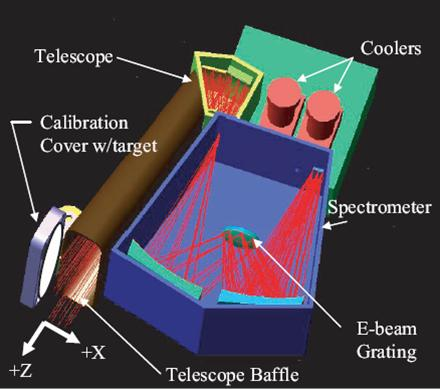

In [6]:
Image('./Pictures/Chandrayaan1_Auto2.jpeg')

**In summary:**

*Spectral Coverage:* 

* 446-3000 nm
* 256 Spectral bands in target mode
* 85 Spectral bands in global mode
 
*Spectral Resolution:*

* Target: 10nm
* Global: 20 or 40 nm

*Spatial Resolution:*
* Target: 70 m/pixel
* Global: 140 m/pixel
* From 200 km orbit spatial sampling remains 140 m/pixel, but cross-track is ~280m/pixel

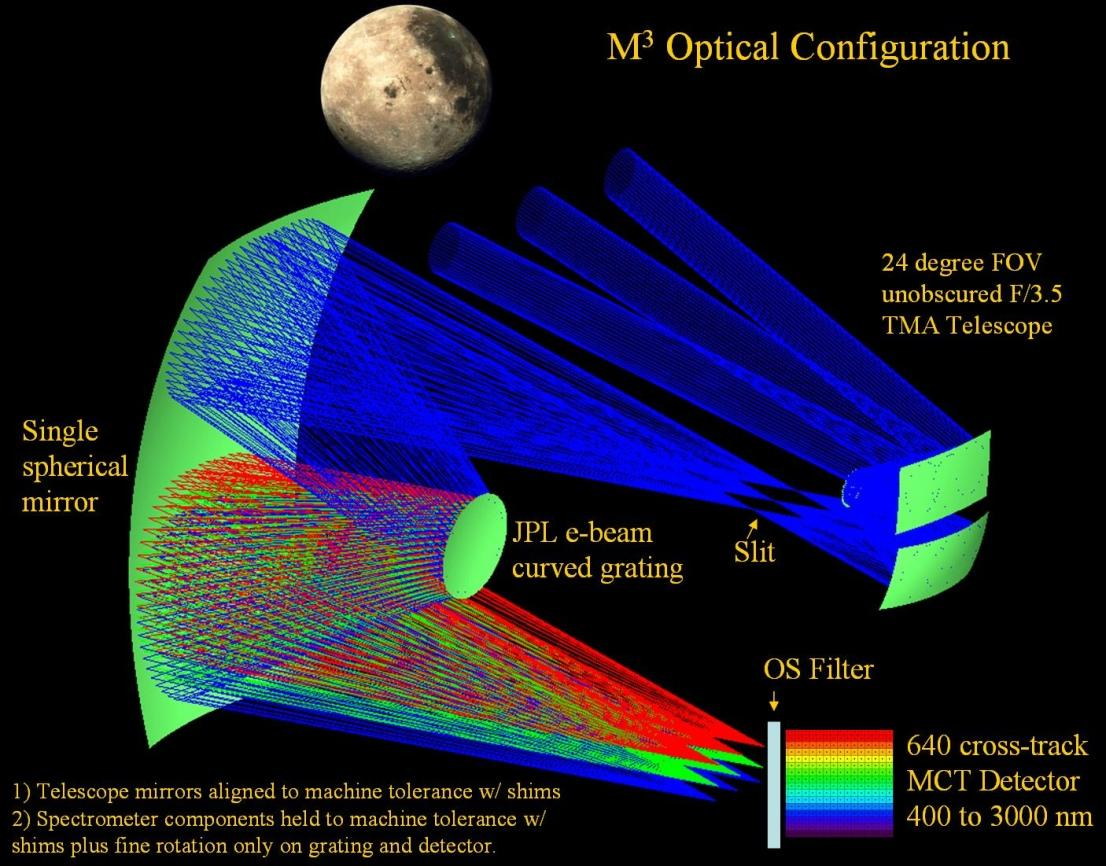

In [7]:
Image('./Pictures/Chandrayaan1_Auto3.jpeg')

<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>3. Data acquisition and Data type</p>

* ** Instrumentation arrived at the moon in November 2008 **
* The data acquisition phase spanned from November 18th 2008 to the 16th of August 2009.
* Data acquisition was split in four periods as indicated below, each period has a specific name which is used as a naming convention to identify the file types.

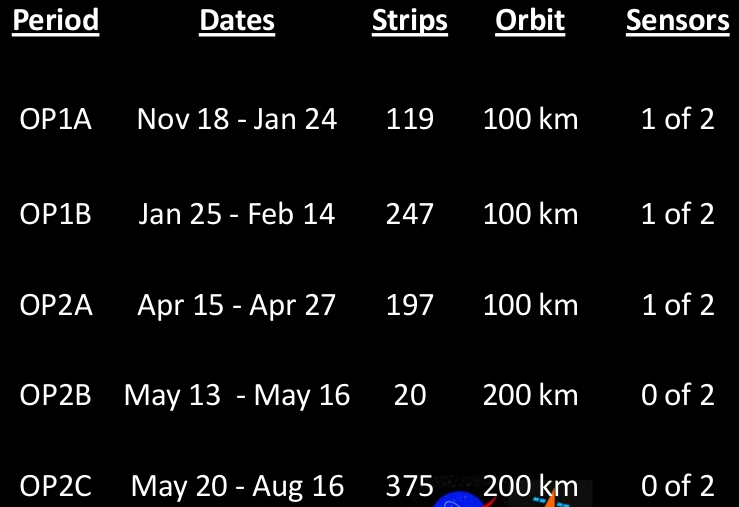

In [4]:
Image('./Pictures/Data_Acquisition2.png')

Please note the sensor column in the above picture refers to the operational functions of the star sensors used for positioning and navigation and do not refer to the infrared spectrometer.

* This analysis will focus on the OP1B data product which benefits from the longest observation period at good temperature conditions which should help a more accurate collection of incoming photons from the lunar surface.

**Hyperspectral data cube** : *newPhoto_OP1B.HDR* | *newPhoto_OP1B.BIL*

* Band 1-85 : Reflectance / Iradiance over the 446-3000 nm spectral range

**Locations Data cube** : *L2_PDS_OP1B_LOC.HDR* | *L2_PDS_OP1B_LOC.BIL*  

* Band 1: Longitude **(Degrees East 0-360) - This will be adjusted in the analysis for ploting in GIS software**
* Band 2: Latitude
* Band 3: Radius

Subtract lunar radius of 1737.4 km to get  difference in elevation from reference sphere. The data is based on LOLA topography (Boardman, 2010), the reference frame is Moon Mean Earth Polar.


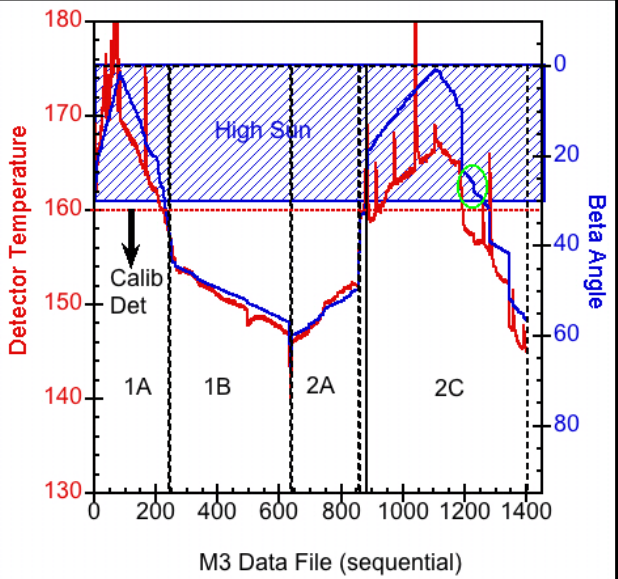

In [3]:
Image('./Pictures/Data_Acquisition.png')

<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>4. Softwares required for Analysis</p> 

**Please note** : Given the numerous installations involved (libraries, database and softwares) **it is highly recommended to set up this environement on a dedicated virtual machine.** VMware Workstation Player is industry standard and possesses a FREE version that is efficient enough to run the below process, once analysts are confident on the workflow they can migrate the below tools to a production environement. *More information on VMware @ https://my.vmware.com/en/web/vmware/free#desktop_end_user_computing/vmware_workstation_player/12_0*

* **Python 3.6, Python 2.7**
* **Jupyter**
* **MongoDB Community Server**
* **MongoDB Compass**
* **QGIS - Including the following plugins which can be downloaded within the QGIS Plugin menu:**
    * Load MongoDB Layer
    * Save Layer in MongoDB

<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>5. Setting up Python environement</p>

**Python 3.* and Python 2.7 are required for this analysis:**

* **Getting Python 3.6**: The easiest way to get Python set up on a workstation is by downloading the Anaconda Python distribution from *https://www.continuum.io/downloads* and by getting the latest python distribution then following the install recommandations for a specific system. Anaconda comes prepackaged with Jupyter Notebook as well as the Spyder IDE which is usefull for pure script writing. Analysts wishing to understand more on how to maintain packages with python shoud focus on the Navigator interface or read about packets handling in the Anaconda documentation https://conda.io/docs/using/pkgs.html. Please note that Linux users should update their .bash_profile environement variables and export the path to Python directory.
    * Main command line operators:
        * **jupyter-notebook** | *Launches Jupyter Notebook*
        * **conda install packagename** | *Installs a specific package*
        * **conda update --all** | *Update all packages installed*
        * **anaconda-navigator** | *Launches the Navigator GUI*
        * **spyder** | *Launches the Spyder IDE*
    * Please note some packages can only be installed via PIP, analysts should run **pip install packagename**
        

* **Setting up a Python 2.7 Environement**: Unfortunately QGIS which is required for this analysis is as of its latest distribution (Las Palmas 2.8.1) only handling requests in Python 2.7. The version 3 of the software is undergoing active devellopment by the community and should handle Python 3 scripting, but in the meantime it is best to install QGIS in a Python 2.7 environement. Anaconda handles setting up different Python environements in a clean and easy way and should be the preffered solution for managing environements. To set up a Python 2.7 environement with Anaconda (terminal window):
    * conda create --name snakes python=2.7 | This will create a dedicated Python 2.7 environement with the name 'snakes'
    * source activate snakes | Switches from Python 3.6 to Python 2.7 environement
    * source deactivate snakes | Exits from Python 2.7 environement
    * QGIS should be installed while in the snakes Python 2.7 environement - fortunately Anaconda handles QGIS installation which insures the software is installed in a clean way with no conflicts relating to Python 3.6. To Install QGIS Analysts should type in their snakes environement: conda install -c conda-forge qgis=2.18.10. Please note that a newer version could be available and should be checked for by searching 'QGIS' on the anaconda cloud (https://anaconda.org/).
    

<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>6. Required libraries for analysis</p>

Prior to running the cells below, please ensure that the following libraries are properly installed on your workstation. If using the anaconda distribution, most librairies should be installed, otherwise use "conda install *packagename*" command in the terminal to install missing libraries *(for more information please visit https://conda.io/docs/using/pkgs.html)*. Please note:

* The PySptools library is not installable through conda or pip, it needs to be manually installed, UNIX users should update their environement variable (.bash_profile) post the installation *(for more information please visit http://pysptools.sourceforge.net/installation.html)*.
* If using anaconda Python distribution, users willing to install spectralPy should look for the library on the conda cloud website and running the install command given there *(for more information please visit https://anaconda.org/ and search for "spectral").*
* Monary is usefull for fast queries in the MongoDB NoSQL database, it gathers data and converts it directly in Numpy arrays without the need for further processing which makes subsequent computations quite easy. Installation of the module is however quite lenghty given the module is coded in C. Analysts interested in using Monary should first install the MongoDB C Driver *http://mongoc.org/*, installation with the tarball is strongly encouraged (instruction available on the website). Once the Mongo DB C Driver is installed, Monary can be installed via Pip through 'pip install monary'.

**Required Libraries**:

* **numpy** - Python library for N-dimensional array manipulation, *more info @ http://www.numpy.org/*
* **pandas** - Python module for data structure and manipulation, *more info @ http://pandas.pydata.org/*
* **json** - Module which encodes Python data types to JSON format and reverse, *more info @ https://docs.python.org/2/library/json.html*
* **matplotlib** - Matplotlib is a Python 2D plotting library, *more info @ https://matplotlib.org/*
* **spectralpy** - Python module for processing hyperspectral image data, *more info @ http://www.spectralpython.net/*
* **Ipython** - Interactive computing library, required for image display in Notebooks *more info @ http://www.spectralpython.net/*
* **PyMongo** - Module required to interact with the MongoDB No-SQL Database, *more info @ https://api.mongodb.com/python/current/*
* **SciKit Learn** - Machine Learning and Data mining in Python, *more info @ http://scikit-learn.org/stable/*
* **SciPy** - Scientific computing for Python, the sub library of interest is SciPy Stats, *more info @*
* **PySptools** - Tools for hyperspectral image processing, *more info @ http://pysptools.sourceforge.net/index.html
* **Seaborn** - Statistical processing and visualisation package, *more info @ http://seaborn.pydata.org/index.html*
* **Monary** - Efficient and fast Cursor interface for MongoDB, faster than PyMongon, *more info @ https://monary.readthedocs.io/*


* Please note, the use of a database is the result of hardware limitations which have rendered the analytical process more complex than if applied on a more recent processing unit. In particular the processing unit used for the analysis cannot handle loading in memory large files (>40 GB in this case), while achieving memory intensive computations and displaying the results. Subsequently a work arround has been found which unfortunately involved the use of multiple libraries. 
* Users in possession of recent computing  units may be able to achieve all these operations in memory. As a consequence the "PySptools" and more importantly "spectralpy" libraries should provide quick and efficient functions to process the data in fewer lines of code and should be the go to libraries for researchers willing to achieve hyperspectral analysis.


In [3]:
## Importing libraries for the session:
 # Please note: %matplotlib inline is required to diplay graphs in the notebook

%matplotlib inline
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from spectral import *
import spectral.io.envi as envi
from IPython.display import Image
from IPython.core.display import HTML
from pymongo import *
import vincent
from sklearn import preprocessing
import pysptools.spectro as spectro
import pysptools.util as util
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns
from monary import Monary

<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>7. Loading up the Data</p>

**Opening data cube using spectralpy:**

**Spectralpy** enables access to hyperspectral data cubes without loading them in memory, individual queries have however to be made to accesss individual or group of pixels. This preserves the ammount of data loaded in memory and frees up capacity to achieve resource intensive computation on a more limited sample size.

In [12]:
pixels_locations = envi.open('./Data/L2_PDS_OP1B_LOC.HDR') # Opens the Location cube, assigns "pixels_locations" name
pixels_cube = envi.open('./Data/newPhoto_OP1B.HDR') # Opens the Hyperspectral cube, assigns "pixels_cube" name
spectral_library = envi.open('./Spectral_Lib/lunar_minerals.HDR') # Opens the spectral library cube, assigns "spectral_library" name

## Printing File specifications:
 # Prints some summary elements of the header file,
 # parsing of the HDR file with a text editor reveals all information is not displayed by the function, analysts wishing
 # to know more about the content of a HDR file should open it with a light text editor and review the information visually.

print(pixels_locations)
print()
print(pixels_cube)
print()
print(spectral_library)

	Data Source:   '././Data/L2_PDS_OP1B_LOC.BIL'
	# Rows:          10039
	# Samples:       12228
	# Bands:             3
	Interleave:        BIL
	Quantization:  64 bits
	Data format:   float64

	Data Source:   '././Data/newPhoto_OP1B.BIL'
	# Rows:          10039
	# Samples:       12228
	# Bands:            85
	Interleave:        BIL
	Quantization:  32 bits
	Data format:   float32



<u><b>Methodolgy of information storage in file</b></u> 

*Band-interleaved-by-line:* BIL format stores the first line of the first band, followed by the first line of the second band, followed by the first line of the third band, interleaved up to the number of bands. Subsequent lines for each band are interleaved in similar fashion. This format provides a compromise in performance between spatial and spectral processing and is the recommended file format for most ENVI processing tasks.

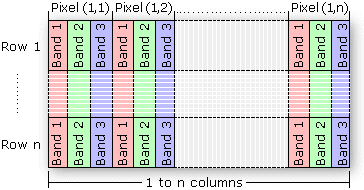

In [13]:
Image('./Pictures/BIL.png')

<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>8. Band analysis example</p>

In the below cells we will showcase examples of band analysis. Unfortunately, our machine being quite slow, each of these operation takes a significant amount of time. Analysts with higher processing power could achieve more statistical analysis on each band as well as on all bands taken together.

**In ENVI the datacube was configured to exclude specific pixels:**

* Pixel with values of -9999 do not contain useful information
* Pixels with values of -999 contain information which usefullness can be argued

In the below cell we will exclude these pixels out of computation in order to display example summary statistics for band 1. Please note that indexing in Python starts at 0 and could lead to possible confusion between band name and indexing methodology.

In [11]:
## Defines a high value filter:
 # This will enable Python to exclude values set to -9999 and -999 and that do not contain relevant data

band_1_flattened = pixels_cube[:,:,0].flatten() # Flattens the matrix from band one into a 1D array
high_value_filter = band_1_flattened >= 0 # The filter generates a boolean matrix whereby only non-negative values are flagged
band_1_flattened_cleaned  = band_1_flattened[high_value_filter] # Stores the cleaned band into a new variable


In [9]:
print("Shape of the band prior to transformation:", np.shape(pixels_cube[:,:,0]))
print("Shape of the band post transformation:", np.shape(band_1_flattened_cleaned))

Shape of the band prior to transformation: (10039, 12228, 1)
Shape of the band post transformation: (102236508,)


Min: 1.69926e-06
Max: 0.282259
Mean: 0.0266671
Median: 0.025059
Stdev: 0.00630041
Kurtosis 8.045219642138516
Skew 1.7318061590194702


(array([  6.34161834e-03,   1.29743274e-02,   2.77090602e-02,
          7.25751437e-02,   1.88145074e-01,   1.17653654e+00,
          2.01010034e+01,   8.02667020e+01,   8.34814069e+01,
          5.27329164e+01,   4.18863580e+01,   3.15137332e+01,
          1.91820371e+01,   1.05284587e+01,   5.54153829e+00,
          2.95357236e+00,   1.66714562e+00,   9.90817222e-01,
          6.17386001e-01,   4.02509100e-01,   2.69231154e-01,
          1.83834159e-01,   1.28454158e-01,   9.31663438e-02,
          6.63305556e-02,   4.88339266e-02,   3.50833574e-02,
          2.60352888e-02,   2.01303065e-02,   1.48802782e-02,
          1.12312487e-02,   8.90598860e-03,   6.55300562e-03,
          5.09755223e-03,   3.99903146e-03,   3.16387844e-03,
          2.51238978e-03,   1.88169331e-03,   1.34802707e-03,
          1.07772858e-03,   6.61884756e-04,   6.89607678e-04,
          5.61389165e-04,   4.81685765e-04,   4.19309191e-04,
          3.53467252e-04,   3.22278965e-04,   1.21287782e-04,
        

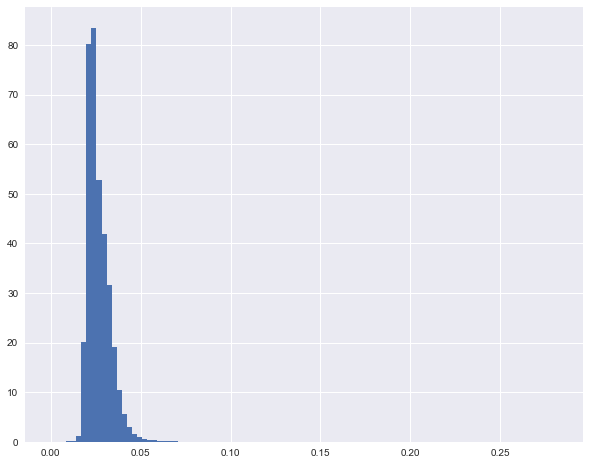

In [12]:
def quickstats(input_image):
    print('Min:', np.min(input_image))
    print('Max:', np.max(input_image))
    print('Mean:', np.mean(input_image))
    print('Median:', np.median(input_image))
    print('Stdev:', np.std(input_image))
    print('Kurtosis', stats.kurtosis(input_image))
    print('Skew', stats.skew(input_image))
    
quickstats(band_1_flattened_cleaned)
fig = plt.figure(figsize=(10,8)) # Generates new figure with dimensions (width,height) in inches
ax = fig.add_subplot(1,1,1) #Specfies number of charts in the figure
ax.hist(band_1_flattened_cleaned, 100, normed=1)

Note that using seaborn, the same plot can be computed in one line of script - bin size can also be adjusted to be more granular.

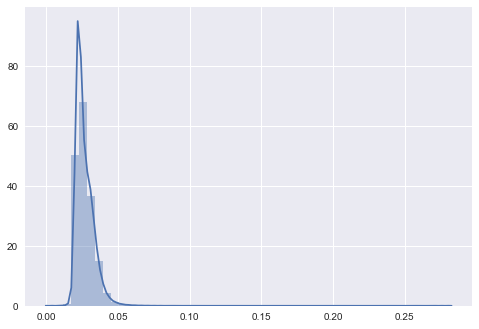

In [46]:
sns.distplot(band_1_flattened_cleaned)

In this case we notice that our data for Band1 is mostly spread between 0 and 0.05 with a tail population principally existing beyond 0.05 and a few outliers beyond that. The distribution displays a strong positive skew indicative of a fat right tail and the existence of outliers. However the kurtosis is at 8 indicative of the distribution beeing quite peaked. The data in the band could therefore be quite homogeneous if the quantity of outliers remains reasonable.

In [45]:
## Assessing the threshold value for a 99% confidence interval

print('Tail population beyond 99% of the distribution (3Stdev) starts at value :', np.mean(band_1_flattened_cleaned) + 3*np.std(band_1_flattened_cleaned))


Tail population beyond 99% of the distribution (3Stdev) starts at value : 0.0455682887696


In [43]:
## Creating an outlier filter with the aims of isolating outliers for further analysis

outlier_filter_band1 = band_1_flattened_cleaned >= 0.0455682887696 #  Generates a boolean matrix whereby only values > 0.05 are flagged
band_1_outliers  = band_1_flattened_cleaned[outlier_filter_band1] # Applies filter and stores result in a new variable


In [44]:
## Assessing the recurrence of outiers as percentage of total populatio

x = np.shape(band_1_outliers) # Gets dimensions of the outliers 1D array
y = np.shape(band_1_flattened_cleaned) # Gets dimensions of the Cleaned Band1 1D array
print('Total number of outliers', x[0], 'pixels') # Note numpy returns the .shape() function as a tuple so we need to specify the index of the data
print('Total number of usable pixels in Band1', y[0], 'pixels')
print('Percentge of outliers expressed as fraction of total usable population', x[0]/y[0]*100, 'percent')


Total number of outliers 1245773 pixels
Total number of usable pixels in Band1 102236508 pixels
Percentge of outliers expressed as fraction of total usable population 1.218520687345855 percent


Min: 0.0455683
Max: 0.282259
Mean: 0.0529582
Median: 0.0501127
Stdev: 0.00875107
Kurtosis 24.542873637134665
Skew 3.3127379417419434


(array([  1.31790825e+02,   8.50846818e+01,   5.68512034e+01,
          3.94756595e+01,   2.75840236e+01,   1.99611540e+01,
          1.45837362e+01,   1.08185941e+01,   8.19771339e+00,
          6.17609459e+00,   4.76018141e+00,   3.63355540e+00,
          2.73788434e+00,   2.16202312e+00,   1.74521898e+00,
          1.37318143e+00,   1.06015440e+00,   8.42425950e-01,
          6.94560525e-01,   5.28042353e-01,   4.34439469e-01,
          3.71359265e-01,   2.80808650e-01,   2.33328926e-01,
          1.98736557e-01,   1.54309101e-01,   1.15647041e-01,
          9.69942921e-02,   7.18978669e-02,   4.71405825e-02,
          5.66365272e-02,   4.47665964e-02,   3.93403423e-02,
          3.59489334e-02,   3.05226793e-02,   3.12009611e-02,
          2.00093120e-02,   1.08525082e-02,   1.62787623e-02,
          1.42439170e-02,   1.35656353e-02,   8.81766292e-03,
          1.28873535e-02,   5.42625410e-03,   7.80024028e-03,
          5.76539499e-03,   5.42625410e-03,   5.76539499e-03,
        

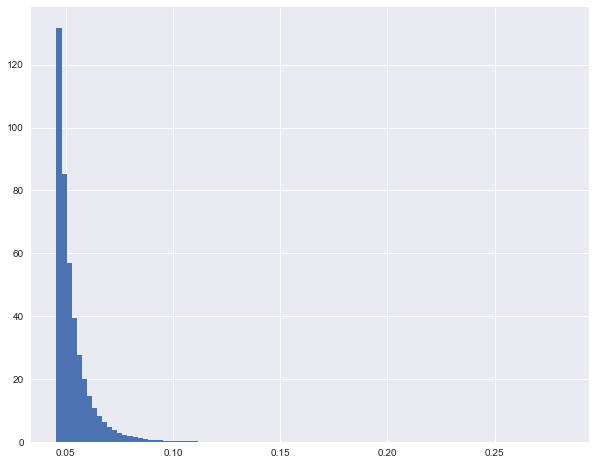

In [51]:
## Analysis of the outliers population

quickstats(band_1_outliers)
fig = plt.figure(figsize=(10,8)) # Generates new figure with dimensions (width,height) in inches
ax = fig.add_subplot(1,1,1) #Specfies number of charts in the figure
ax.hist(band_1_outliers, 100, normed=1)


If we were achieving multibands calculation we could construct filters that apply to both bands and hence make sure dimensions and pixels are conserved between both bands.

In [ ]:
## Example of principal components analysis implementation :
 # Processing power permitting, one could run PCA on a whole data cube with the below code
 # One could then parse the pc object for % of variance explained per PC and funnel down to specific values in 
 # eigen vectors 

pc = principal_components(pixels_cube)

<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>9. Process walkthrough : One pixel example</p>

The process outlined below illustrate the successive steps that are applied to the data to make it ready for statistical processing.

* a. Loading up the wavelength file
* b. Extracting pixel data from the cube
* c. Applying continuum removal
* d. Extracting pixel coordinates
* e. Extracting and loading up spectral libraries, applying continuum removal, applying data standardization
* f. Applying regression analysis for mineral estimation
* g. Spectral curve steepness
* h. Shortcommings of the methodology

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>a. Loading up the wavelengths file</p>

The envi header file **"newPhoto_OP1B.HDR"** contains the exact wavelength for each of the 85 Bands of the instrument.
These wavelenghts were extracted manually and stored into a .txt format in the file **"wavelengths.txt"**. It could be possible to design a parsing function that extracts these features automaticaly and inputs them in a numpy array. However due to time constrains and the small amount of manual work involved - we extracted these manually.

In [13]:
wavelengths = np.loadtxt('./Data/wavelengths.txt') # Loads txt file data in memory under the "wavelengths" variable
wavelengths = wavelengths.flatten().tolist()

#print(wavelenghts.shape)# The answer returned confirms that vector is is indeed a 1D array
print()
print(wavelengths) # Print contents of the txt file


[460.98999, 500.920013, 540.840027, 580.76001, 620.690002, 660.609985, 700.539978, 730.47998, 750.440002, 770.400024, 790.369995, 810.330017, 830.289978, 850.25, 870.210022, 890.169983, 910.140015, 930.099976, 950.059998, 970.02002, 989.97998, 1009.950012, 1029.910034, 1049.869995, 1069.829956, 1089.790039, 1109.76001, 1129.719971, 1149.680054, 1169.640015, 1189.599976, 1209.569946, 1229.530029, 1249.48999, 1269.449951, 1289.410034, 1309.380005, 1329.339966, 1349.300049, 1369.26001, 1389.219971, 1409.189941, 1429.150024, 1449.109985, 1469.069946, 1489.030029, 1508.98999, 1528.959961, 1548.920044, 1578.859985, 1618.790039, 1658.709961, 1698.630005, 1738.560059, 1778.47998, 1818.400024, 1858.329956, 1898.25, 1938.180054, 1978.099976, 2018.02002, 2057.949951, 2097.870117, 2137.800049, 2177.719971, 2217.639893, 2257.570068, 2297.48999, 2337.419922, 2377.340088, 2417.26001, 2457.189941, 2497.110107, 2537.030029, 2576.959961, 2616.879883, 2656.810059, 2696.72998, 2736.649902, 2776.580078, 2

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>b. Extracting data from a random pixel in the center of the picture</p>

Using traditional **numpy array slicing**, we extract the data of one pixel accross the 85 bands of the instrument. This pixel data is however in the (1,1,85) matrix format and hence needs to be flattened to be processed statistically. The native Python **.flatten()** function can turn the data to a 1D array.

In [14]:
## Accessing data of one pixel in the cube and inserting data into Numpy array: 
test_pixel = np.array(pixels_cube[5019,6114,:]) # Inserts the pixel in an Numpy Ndarray
print("Shape of the numpy array prior to transformation", test_pixel.shape)
print()

## Flatenning exctrated 3D array to a 1D array
test_pixel = test_pixel.flatten() # Flatten the pixel in a 1D array for import into pandas
print("Shape of the numpy array after to transformation", test_pixel.shape)
print()
print(test_pixel)

Shape of the numpy array prior to transformation (1, 1, 85)

Shape of the numpy array after to transformation (85,)

[ 0.01970154  0.02515396  0.02590987  0.02655305  0.03000216  0.03059468
  0.03028193  0.03188113  0.03308282  0.03249181  0.03596386  0.03607793
  0.0361371   0.03407372  0.03697982  0.03601551  0.04221932  0.03727434
  0.0387532   0.03621075  0.03978242  0.03619603  0.03718419  0.03942196
  0.03947632  0.04027117  0.04076725  0.04291484  0.0448221   0.04389862
  0.04527591  0.0473058   0.04624794  0.04784511  0.04834941  0.04912394
  0.04845221  0.05077044  0.04964502  0.05044544  0.05038699  0.05182662
  0.05387235  0.0525263   0.05536628  0.05724718  0.05660517  0.05574533
  0.05677805  0.05805996  0.05929761  0.06087246  0.06071894  0.06239585
  0.06517717  0.06675548  0.06630448  0.06920431  0.0682842   0.07030559
  0.07146777  0.0728182   0.07371665  0.07386219  0.07624353  0.0756264
  0.07704786  0.07913767  0.08145323  0.0821263   0.08449221  0.08481564
  0.0881

Summary statistics calculations of the test pixel:

In [128]:
print('Min:', np.min(test_pixel))
print('Max:', np.max(test_pixel))
print('Mean:', np.mean(test_pixel))
print('Median:', np.median(test_pixel))
print('Stdev:', np.std(test_pixel))
print('Skew:', stats.skew(test_pixel))
print('Kurtosis', stats.kurtosis(test_pixel))

Min: 0.0197015
Max: 0.104665
Mean: 0.0580445
Median: 0.0525263
Stdev: 0.0225191
Skew: 0.4953136742115021
Kurtosis -0.8480193704999675


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>c. Extracting pixel coordinates</p>

Using traditional **numpy array slicing**, we extract the location data of one pixel accross the 85 bands of the instrument. This pixel data is however in the (1,1,85) matrix format and hence needs to be flattened to be processed statistically. The native Python **.flatten()** function can turn the data to a 1D array.

In [40]:
pixel_longitude =  pixels_locations[5019,6114,0] - 360 # Note longitude data needs to be adjusted to be expressed as a [-180, 180] coordinates system 
pixel_latitude = pixels_locations[5019,6114,1]
pixel_elevation = pixels_locations[5019,6114,2]

print('pixel longitude:', pixel_longitude, ', pixel latitude:', pixel_latitude,', pixel elevation:', pixel_elevation)

pixel longitude: -19.3135449982 , pixel latitude: 34.5890623806 , pixel elevation: 1735109.38659


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>d. Continuum Removal</p>

So called space weathering is the product of micrometeoritic impacts hitting the surface of airless bodies in the likes of asteroid  or rocky planets. The effect of space weathering is the production of regolith with smaller grain size being linked to longer exposure to micrometeortic impacts. From a spectroscopy perspective, this leads to the spectrum of airless bodies to be more or less "red" which is translated by a steeper slope of the spectral curve. This change in spectral curve steepness needs to be removed if the data set is to be processed quantitavely for absorbtion bands analysis.


**Continuum removal using the PySptools library:**

The **spectro.convex_hull_removal()** function require two 1D vectors as inputs. The first is the flattened pixel representative of the VIS/NIR spectrum. The second is 1D wavelegnth vector extracted from the HDR file. Both vectors are fed in the function as evidenced below:

In [15]:
cr_pixel_spectrum = spectro.convex_hull_removal(test_pixel, wavelengths)
print(np.shape(cr_pixel_spectrum[0]))
print(cr_pixel_spectrum) # cr_pixel1_spectrum stands for "Continuum Removed Pixel1 Spectrum"

## Note the product of the function is a Python tuple containing three elements:
 # [0] The spectrum modified with continuum removed
 # [1] The wavelegnth at which key nodes for continuum determination were used
 # [2] The values at associated with key nodes wavelenghts

(85,)
([1.0, 1.0, 0.96611155188151832, 0.93222680976752526, 0.99514179914239065, 0.96169225265788372, 0.90451756485684498, 0.91804743113467779, 0.93035135281048509, 0.89283174922555342, 0.96613002419009186, 0.94799651215526448, 0.92922752720487944, 0.85780955037643014, 0.91186258482126925, 0.87022294297015879, 1.0, 0.8699433678013192, 0.89140283880858773, 0.8210692097932123, 0.88940039310649932, 0.79801944794832336, 0.80861785410949549, 0.84573947680828798, 0.8356553339205427, 0.84130512695964177, 0.84064250909072535, 0.87362211984461713, 0.90093903858155122, 0.87138542661269214, 0.88766721116016456, 0.91618690793497537, 0.88494356117904216, 0.90464226994132346, 0.90345762176563893, 0.90729120603172753, 0.88462667389194316, 0.91645207602584589, 0.88609967353474983, 0.89041290773339732, 0.87963774184802868, 0.89496078466697293, 0.92031399784235235, 0.88780150711425376, 0.92598148092789401, 0.94749450110621758, 0.92723797315361456, 0.90385726819797829, 0.91132902760662782, 0.918034393716

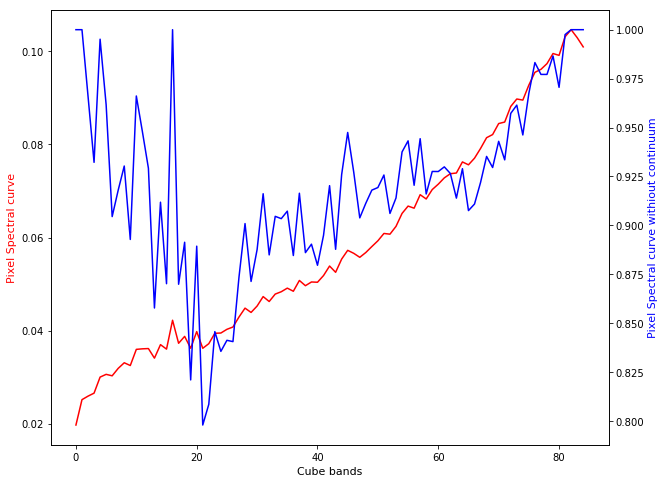

In [8]:
## Ploting the raw spectrum extracted from the hyperspectral cube vs. the same spectrum processed for continuum removal

fig = plt.figure(figsize=(10,8)) # Generates new figure with dimensions (width,height) in inches
ax = fig.add_subplot(1,1,1) #Specfies number of charts in the figure
ax2 = ax.twinx() # Adds secondary axis
ax.set_xlabel("Cube bands",fontsize=11,color='black') # Labels x axis
ax.set_ylabel("Pixel Spectral curve",fontsize=11,color='red') # Labels left x axis
ax2.set_ylabel("Pixel Spectral curve withiout continuum",fontsize=11,color='blue') # Labels right X axis
ax.plot(test_pixel, c='r') # Plots raw pixel extracted from the cube
ax2.plot(cr_pixel_spectrum[0], c='b') # Plots raw pixel extracted from the cube with continuum removed

The continuum removal algorythm can be further studied in Clark, R.N. and T.L. Roush (1984) Reflectance Spectroscopy: Quantitative Analysis Techniques for Remote Sensing Applications, J. Geophys. Res., 89, 6329-6340.

In [58]:
print('Min:', np.min(cr_pixel_spectrum[0]))
print('Max:', np.max(cr_pixel_spectrum[0]))
print('Mean:', np.mean(cr_pixel_spectrum[0]))
print('Median:', np.median(cr_pixel_spectrum[0]))
print('Stdev:', np.std(cr_pixel_spectrum[0]))
print('Skew:', stats.skew(cr_pixel_spectrum[0]))
print('Kurtosis', stats.kurtosis(cr_pixel_spectrum[0]))

Min: 0.798019447948
Max: 1.0
Mean: 0.920682068114
Median: 0.920313997842
Stdev: 0.0451793000339
Skew: -0.25466923374170636
Kurtosis 0.07127526249217064


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>e. Extracting and loading up spectral libraries, applying continuum removal, applying data standardization</p>

Loading up the spectral library via the HDR file does not return any information in the Python Console beyond the "spectral.io.envi.SpectralLibrary object at 0x7f980df26be0" displayed above. Therefore by manually parsing the HDR file we have been able to extract the spectra from the reference mineral by noting their position in the file and using the index to access the data. Please note Python starts indexing at [0] instead of [1].

In [7]:
print("Shape of the Orthopyroxene spectrum", np.shape(spectral_library.spectra[2]))
print(spectral_library.spectra[2])
print()
print("Shape of the Orthopyroxene spectrum", np.shape(spectral_library.spectra[2][1:76]))
print(spectral_library.spectra[2][1:76])


Shape of the Orthopyroxene spectrum (86,)
[ 0.1436051   0.16521098  0.1893705   0.20421505  0.20544559  0.20745172
  0.21291694  0.21676262  0.21319339  0.20061885  0.1787159   0.15148936
  0.12756488  0.10668212  0.09144029  0.08178838  0.07579984  0.07214328
  0.07290217  0.07634911  0.08396861  0.09572958  0.1112248   0.12806377
  0.14659503  0.16255026  0.1748336   0.1844596   0.19121805  0.19547652
  0.1995424   0.20244551  0.20618726  0.21044959  0.21434684  0.21795626
  0.22043493  0.2220577   0.22296003  0.2212332   0.2186538   0.21515892
  0.20911224  0.20223242  0.19358541  0.1859245   0.17611358  0.16657172
  0.15759122  0.14921957  0.13272092  0.1185702   0.10752019  0.09796645
  0.09059921  0.08581461  0.08288112  0.08113684  0.07964604  0.08081579
  0.0835586   0.08564727  0.09119167  0.09779627  0.10453741  0.1119294
  0.12048534  0.12969753  0.1382907   0.14821479  0.15587623  0.16509601
  0.17256789  0.18036973  0.18232545  0.18475901  0.          0.          0.
  0.  

Analysts will note from the above that unlike for the Spectral data extracted from the M3 Datacube, **the data from the spectral library has 0 values and spans over 86 samples**. Investigation of these two characteristics has led to the following explanations:

* **Presence of 0 values**: This is linked to the way the Spectral Libraries were constructed as mineral spectral characteristics were recorded only to 2.6 microns, hence all values post this limit had been arbitrarilly set to 0.
* **Presence of 86 samples/bands**: Anaysis of the HDR file has revealled that the recording of the spectrum per mineral in the spectral library starts at **421.070007 nm** instead of **460.989990 nm**. 

Consequently:

* As a consequence, for all our statistical processing **the last 10 Bands of the datacube will have to be excluded of the analysis**. This 8.5% reduction in available data is not insignificant given our analysis used to span 85 points per pixel. However one could argue that past 2.6 microns the spectrum becomes more and that as consequence it should be excluded from the analysis.
* In addition, **the first value in the Spectral Library data needs to be dropped** to maintain consistency with the spectral resolution of the M3 data.

In [16]:
## Importing reference minerals from the spectral library:
 # Using the variable we have declared in section 5 of this notebook,
 # we can then access spectral data through the following:

orthopyroxene = spectral_library.spectra[2][1:76]
olivine = spectral_library.spectra[3][1:76]
plagioclase = spectral_library.spectra[4][1:76]
clinopyroxene = spectral_library.spectra[5][1:76]
test_pixel_short = test_pixel[:75]

In [17]:
## Applying continuum removal:
 # Just like in the previous "one pixel case" we apply continuum removal and plot the different minerals for comparison

cr_orthopyroxene = spectro.convex_hull_removal(orthopyroxene, wavelengths)
cr_olivine = spectro.convex_hull_removal(olivine, wavelengths)
cr_plagioclase = spectro.convex_hull_removal(plagioclase, wavelengths)
cr_clinopyroxene = spectro.convex_hull_removal(clinopyroxene, wavelengths)
cr_test_pixel_short = spectro.convex_hull_removal(test_pixel_short, wavelengths)


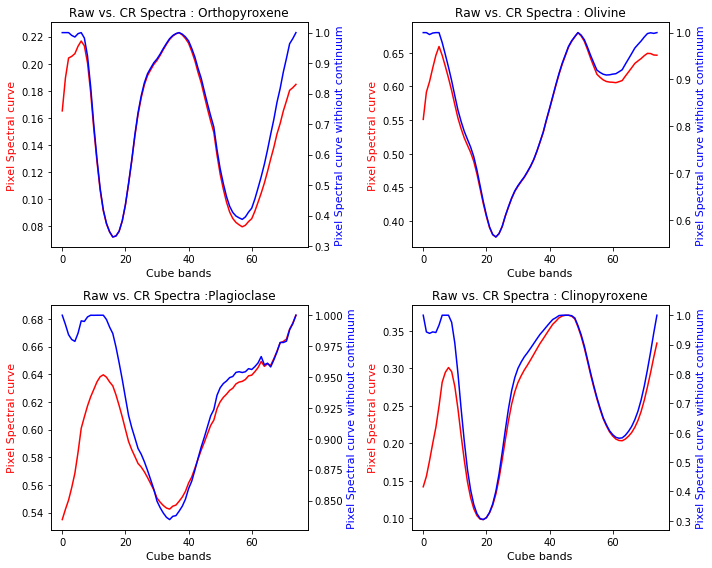

In [13]:
## Ploting the raw spectrum extracted from the spectral library vs. the same spectrum processed for continuum removal

fig = plt.figure(figsize=(10,8)) # Generates new figure with dimensions (width,height) in inches
 
    # Generates orthopyroxene graph
    
ax = fig.add_subplot(2,2,1) #Specfies number of charts in the figure
ax2 = ax.twinx() # Adds secondary axis
ax.set_xlabel("Cube bands",fontsize=11,color='black') # Labels x axis
ax.set_ylabel("Pixel Spectral curve",fontsize=11,color='red') # Labels left x axis
ax2.set_ylabel("Pixel Spectral curve withiout continuum",fontsize=11,color='blue') # Labels right X axis
ax.plot(orthopyroxene, c='r') # Plots raw pixel extracted from the cube
ax.set_title("Raw vs. CR Spectra : Orthopyroxene")
ax2.plot(cr_orthopyroxene[0], c='b') # Plots raw pixel extracted from the cube with continuum removed

    # Generates olivine graph

ax = fig.add_subplot(2,2,2)
ax2 = ax.twinx() 
ax.set_xlabel("Cube bands",fontsize=11,color='black')
ax.set_ylabel("Pixel Spectral curve",fontsize=11,color='red')
ax2.set_ylabel("Pixel Spectral curve withiout continuum",fontsize=11,color='blue')
ax.plot(olivine, c='r')
ax.set_title("Raw vs. CR Spectra : Olivine")
ax2.plot(cr_olivine[0], c='b')

    # Generates plagioclase graph

ax = fig.add_subplot(2,2,3)
ax2 = ax.twinx() 
ax.set_xlabel("Cube bands",fontsize=11,color='black')
ax.set_ylabel("Pixel Spectral curve",fontsize=11,color='red')
ax2.set_ylabel("Pixel Spectral curve withiout continuum",fontsize=11,color='blue')
ax.plot(plagioclase, c='r')
ax.set_title("Raw vs. CR Spectra :Plagioclase")
ax2.plot(cr_plagioclase[0], c='b')

    # Generates clinopyroxene graph
    
ax = fig.add_subplot(2,2,4)
ax2 = ax.twinx() 
ax.set_xlabel("Cube bands",fontsize=11,color='black')
ax.set_ylabel("Pixel Spectral curve",fontsize=11,color='red')
ax2.set_ylabel("Pixel Spectral curve withiout continuum",fontsize=11,color='blue')
ax.plot(clinopyroxene, c='r')
ax.set_title("Raw vs. CR Spectra : Clinopyroxene")
ax2.plot(cr_clinopyroxene[0], c='b')

plt.tight_layout()

Prior to achieving the regression analysis, for this we insert our data into a dictionary which will then be transformed into a data frame.

In [18]:
dict_spectral_library = {'cr_orthopyroxene': cr_orthopyroxene[0],
                         'cr_olivine': cr_olivine[0],
                         'cr_plagioclase': cr_plagioclase[0],
                         'cr_clinopyroxene': cr_clinopyroxene[0],
                         'cr_test_pixel': cr_test_pixel_short[0]}

Conversion to data frame format enables easy plotting especially when compared to the matplotlib library

In [19]:
spectral_library_dataframe = pd.DataFrame(dict_spectral_library, index=wavelengths[0:75])
spectral_library_dataframe.head()

,cr_clinopyroxene,cr_olivine,cr_orthopyroxene,cr_plagioclase,cr_test_pixel
460.989990,1.000000,1.000000,1.000000,1.000000,1.000000
500.920013,0.943164,1.000000,1.000000,0.992526,1.000000
540.840027,0.938210,0.995904,1.000000,0.984212,0.966112
580.760010,0.943223,0.999103,0.990808,0.980318,0.932227
620.690002,0.941163,1.000000,0.985571,0.978847,0.995142


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>f. Applying regression analysis for mineral identification</p>

Using the statsmodel library we can write our regression equation in the form of:
    
    y = a1x1 + a2x2 + a3x3 + a4x4 + b with:
        
        a as independant variable coefficients
        x independant variables representing mineral spectrum
        b intercept

* Statsmodel then creates a regression object which stores the statistics from the OLS. Many more functionalities are available in statsmodel and analysts wishing to dwelve into the richness of the library can find out more information @ 
* Python spectral analysis modules in the likes of spectral py and or pysptools do contain regression modules, however their outputs do not provide the richness of statistical information produced by statsmodel. Hence statsmodel should be our go to library for verifiying significance testing.


In [20]:
regression = smf.ols(formula='cr_test_pixel ~ cr_clinopyroxene + cr_olivine + cr_orthopyroxene + cr_plagioclase', data=spectral_library_dataframe).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:          cr_test_pixel   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     30.10
Date:                Fri, 28 Jul 2017   Prob (F-statistic):           1.42e-14
Time:                        10:53:43   Log-Likelihood:                 162.90
No. Observations:                  75   AIC:                            -315.8
Df Residuals:                      70   BIC:                            -304.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7187      0.078  

In this specific case and according to the regression: The presence of both Olivine and Plagioclase would appear to display statistical significance while the coeffecients of both pyroxene and clinopyroxene

In [21]:
## Adding the fitted values from the regression to the existing dataframe
 
    # Adding fitted values to the data frame

spectral_library_dataframe['fitted_values'] = regression.fittedvalues
spectral_library_dataframe.head() # Prints the first 5 lines of the DataFrame

,cr_clinopyroxene,cr_olivine,cr_orthopyroxene,cr_plagioclase,cr_test_pixel,fitted_values
460.989990,1.000000,1.000000,1.000000,1.000000,1.000000,0.967717
500.920013,0.943164,1.000000,1.000000,0.992526,1.000000,0.969716
540.840027,0.938210,0.995904,1.000000,0.984212,0.966112,0.968940
580.760010,0.943223,0.999103,0.990808,0.980318,0.932227,0.969605
620.690002,0.941163,1.000000,0.985571,0.978847,0.995142,0.969850


In [14]:
    # We can also access different regression statistics in the regression object and display them 
    # or use them to run classificatin algorythm

print(regression.pvalues) # Accesses p-values from the regression
print()
print(regression.params)
print()
print("Goodness of fit as measured through R2", regression.rsquared) # Accesses R2

Intercept           9.010909e-14
cr_clinopyroxene    3.858780e-01
cr_olivine          1.757211e-07
cr_orthopyroxene    3.350986e-01
cr_plagioclase      7.668152e-01
dtype: float64

Intercept           0.718726
cr_clinopyroxene   -0.031330
cr_olivine          0.286758
cr_orthopyroxene    0.022804
cr_plagioclase     -0.029240
dtype: float64

Goodness of fit as measured through R2 0.632391000707


It is then possible to plot our fitted values vs. the actual pixel spectrum and compare both them to the reference minerals we are trying to identify. Please note the script below is written in and uses Vincent Library - a clear gain of time and space when compared to matplotllib.

In [22]:
vincent.core.initialize_notebook()
line = vincent.Line(spectral_library_dataframe)
line.axis_titles(x='Index', y='Value')
line.legend(title='Categories')

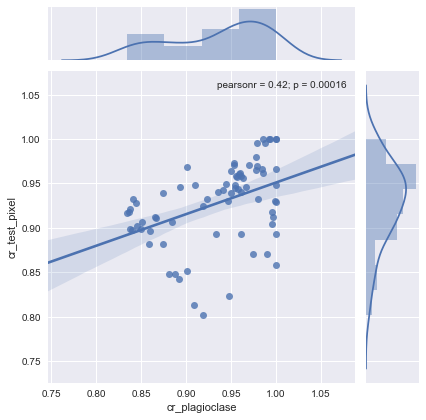

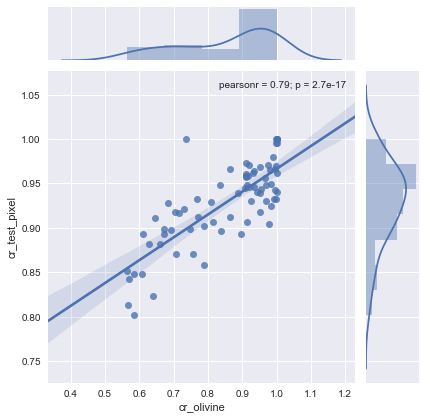

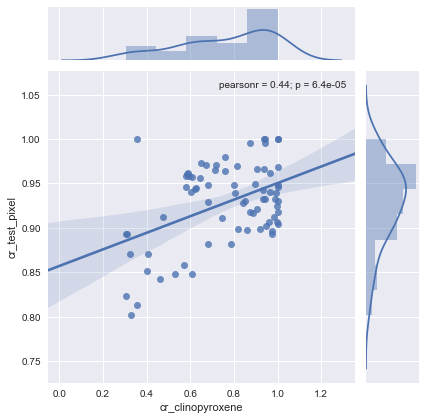

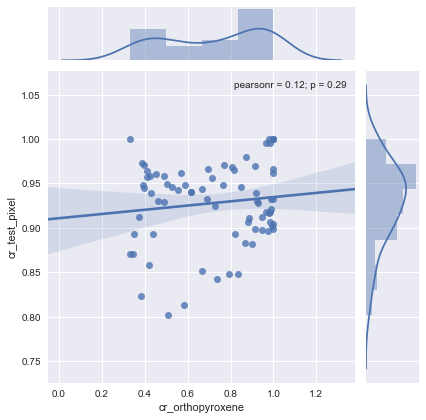

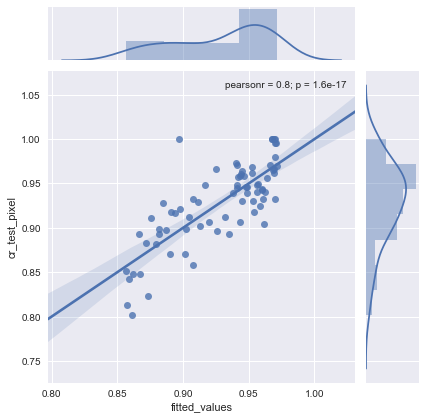

In [16]:
# Using seaborn we can easily plot an individual regression to assess the relevance of the solution proposed by the model

sns.jointplot(x="cr_plagioclase", y="cr_test_pixel", data=spectral_library_dataframe, kind="reg")
sns.jointplot(x="cr_olivine", y="cr_test_pixel", data=spectral_library_dataframe, kind="reg")
sns.jointplot(x="cr_clinopyroxene", y="cr_test_pixel", data=spectral_library_dataframe, kind="reg")
sns.jointplot(x="cr_orthopyroxene", y="cr_test_pixel", data=spectral_library_dataframe, kind="reg")
sns.jointplot(x="fitted_values", y="cr_test_pixel", data=spectral_library_dataframe, kind="reg")


The result of the contiunuum removal process produces the blue line above. It is quite striking to note how noisy the new spectrum is once the continuum has been removed. In a further step, to "de-noise" the spectrum we will apply a ratioing technique.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>f. Shortcommings of the methodology</p>

* OLS usually requires independant variables to display no degree of colinearity - unfortunately the spectra of olivine, plagiocalse, clinopyroxene and orthopyroxene do display a positive correlation. This should hence reduced our confidence in a traditional OLS framework.
* At this stage the main shortcomming is that the spectrum of the test pixel is quite noise after correcting for the continuum. In order to reduce the noise we will divide the spectrum of the test pixel by that of a "bland" pixel which should be representative of a relatively featureless endmember yet still dispay noise characteristics.
* To identify a representative "bland" pixel we propose running a scoring model based on the following parameters:
    
        * Stdev: Standard deviation arround the mean should be low
        * Skew: Close to normal
        * Kurtosis: Close to normal
        
* **Please note this methodology and further denoising was note implemented due to time constrains**

<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>10. No-SQL server installation: Mongo DB</p>

MongoDB is the preffered database structure for the repository of our data. The key rationales for selecting this database are as follows:

* Easy to use and install, the absence of SQL makes the database quite easy to configure
* **Relies on JSON** which is a flexible and easy format to process
* **Python dictionaries are a natural fit to the structure of MongoDB documents**
* Python dictionaries can easily be converted to JSON format through the **Python JSON library**
* The PyMongo library easily handles I/O operations between the local MongoDB server

**In the below we will:**

* a. Install MongoDB on our UNIX workstation
* b. Starting MongoDB with UNIX terminal
* c. Define a nomenclature for the MongoDB Database based on our data products
* d. Input our data into Python dictionaries following the previously defined classification scheme
* e. Querrying the database

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>a. Installing MongoDB</p>

* **MongoDB Community Server:**

Mongo DB Community Server is the open source free version of the NoSQL MongoDB database. Analysts wishing to install MongoDB Community Server on their workstations should refer to https://docs.mongodb.com/manual/administration/install-community/

* **MongoDB Compass:**

MongoDB Compass is an interface that enables a user friendly interaction with the created databases and their constituents. Installation of Compass is highly recommended for visualisation of the uploaded data and thir respective fields. More information available on https://www.mongodb.com/download-center?jmp=nav#compass

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>b. Starting MongoDB</p>

To start MongoDB users should load up their UNIX terminal and type in:

* ** *sudo service mongod start* **

To stop MongoDB users should load up their UNIX terminal and type in:

* ** *sudo service mongod stop* **

By default upon installation MongoDB will create a database locally on the workstation. Accessing the database through Compass is easy and preconfigured. THe adress of the database is 'localhost' and the port to query is 27012

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>c. Nomenclature for MongoDB Database</p>

**Database:**

* Compared to traditional SQL database, MongoDB labels various storage mechanisms differently. As such:

    * In SQL a database is called a database; this is also true in MongoDB where a database will be called similiraly
    * In SQL a database contains tables while in MongoDB a database contains "collections"
    * In SQL a table contains rows while in MongoDB a "collection" contains documents
    
* As such, the MongoDB database that was put in place is organised as following :
    * Database Name : **M3**
        * Collections : 
            * **spectrum**
            * **test**

* For the purpose of the one pixel demonstration we will use the test collection

______

We propose a data structure organised arround the python dictionaries; this data structure was inspired by the Google Map API. The rationale for choosing this structure is as follows:

* Each pixel needs to be georeferenced with latitude and longitude coordinates
* Each pixel should be readable by a Geographic Information system and hence should be GeoJSON referenced
* The level of information contained in each spectral curve will vary hence the need for a flexible data structure where fields can be ignored or not used when doing analysis on the data is irrelevant.

**We propose wrapping up the data in dictionaries based on the following framework:**
   * pixel_name Key : Contains the name of the pixel in the matrix
   * is_relevant Key : Boolean operator indicating whether the pixel contains usefull information or not
   * spectrum Key :  Will contain two further dictionaries
        * **raw_spectrum** : Numpy array of raw spectrum extracted from the datacube as well as summary statistics (8 dictionaries)
        * **processed_spectrum** : Numpy array of continuum removed spectrum as well as summary statistics (8 dictionaries)
   * location Key : Will contain 3 further dictionaries including one expressed in GeoJSON
        * **lat** : float variable housing latitude coordinates of the pixel
        * **lon** : float variable housing longitude coordinates of the pixel
        * **GeoJSON**
   * regression Key : Will contain X further dictionaries
        * **goodness_of_fit**: float variable housing the R2 of the OLS regression
        
        * **olivine**: Will contain two further dictionaries
            * *coefficient* : float variable housing the coefficient determined from the multifactor regression analysis
            * *pvalue* : float variable housing the pvalue of the olivine regression coefficient
        
        * **opx**: Will contain two further dictionaries
            * *coefficient* : float variable housing the coefficient determined from the multifactor regression analysis
            * *pvalue* : float variable housing the pvalue of the olivine regression coefficient
        
        * **cpx**: Will contain two further dictionaries
            * *coefficient* : float variable housing the coefficient determined from the multifactor regression analysis
            * *pvalue* : float variable housing the pvalue of the olivine regression coefficient
        
        * **plagioclase**: Will contain two further dictionaries
            * *coefficient* : float variable housing the coefficient determined from the multifactor regression analysis
            * *pvalue* : float variable housing the pvalue of the olivine regression coefficient
            


          pixel_dictionary = {'pixel_name': [r,c],
                             'is_relevant': is_relevant_loop,
                             'spectra':
                                       {'raw_spectrum':  
                                                               {'spectrum_raw': pixel_shortened.tolist(),
                                                                'max': np.min(pixel_shortened.tolist()),
                                                                'min': np.max(pixel_shortened.tolist()),
                                                                'mean': np.mean(pixel_shortened.tolist()),
                                                                'median': np.median(pixel_shortened.tolist()),
                                                                'stdev': np.std(pixel_shortened.tolist()),
                                                                'skew': stats.skew(pixel_shortened),
                                                                'kurtosis': stats.kurtosis(pixel_shortened)},
                                        'cr_spectrum': 
                                                               {'spectrum_cr': cr_pixel_spectrum[0],
                                                                'max': np.min(cr_pixel_spectrum[0]),
                                                                'min': np.max(cr_pixel_spectrum[0]),
                                                                'mean': np.mean(cr_pixel_spectrum[0]),
                                                                'median': np.median(cr_pixel_spectrum[0]),
                                                                'stdev': np.std(cr_pixel_spectrum[0]),
                                                                'skew': stats.skew(cr_pixel_spectrum[0]),
                                                                'kurtosis': stats.kurtosis(cr_pixel_spectrum[0])},
                                        'cr_indexed_spectrum':  []},
                                        'location':
                                                               {'type': "Point",
                                                                'coordinates': [pixel_longitude_loop, pixel_latitude_loop],
                                                                'lon': pixel_longitude_loop,
                                                                'lat':pixel_latitude_loop},
                                        'regression':
                                                               {'clinopyroxene': 
                                                                                 {'coefficient': regression.params[1],
                                                                                  'pvalue': regression.pvalues[1]},
                                                                'olivine': 
                                                                                 {'coefficient': regression.params[2],
                                                                                  'pvalue': regression.pvalues[2]},
                                                                'orthopyroxene': 
                                                                                 {'coefficient': regression.params[3],
                                                                                  'pvalue': regression.pvalues[3]},
                                                                'plagioclase': 
                                                                                 {'coefficient': regression.params[4],
                                                                                  'pvalue': regression.pvalues[4]},
                                                                'goodness_of_fit': regression.rsquared}}


Unfortunately MongoDB has difficulties registering numpy arrays, to solve this issue we need to convert numpy arrays to list format prior to inserting them into the dictionary. This dictionary will then be converted to BSON format and uploaded to the MongoDB database

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>d. Building up the export script</p>

In this step the various elements of the analysis will be brought together:

* Extraction of Spectral data from the cube, Spectral library, Location of each pixel
* Prepare the data into DataFrame
* Test whether the pixel is worthy of analysis or not:
    * If not worthy - only register pixel coordinates and assign an unusable flag
    * If worthy:
        * Proceed with continuum removal
        * Achieve regression analysis
        * Compute summary statistics on processed and unprocessed spectrum
        * Insert regression outputs, summary statistics, GeoLocation, processed and unprocessed spectra into a dictionary
        * Insert dictionary into MongoDB

The bulk of these steps have been described in the sections above - the below cells will therefore only focus on the elements of the export script that have not been discussed.

In [42]:
# Does the pixel contain valuable information or has been deemed unusuable in the prior analytical step:

if (test_pixel[0] == -9999) or (test_pixel[0] == -999):
    is_relevant = 0
else:
    is_relevant = 1

print('Is the pixel relevant to analysis ? 1 = Yes, 0 = No : Relevance = ', is_relevant)

Is the pixel relevant to analysis ? 1 = Yes, 0 = No : Relevance =  1


In [10]:
## Uploading records in MongoDB:
 # Using the PyMongo library we first start by creating a client that will connect to the database; please note that for
 # the purpose of this analysis a server was created on the local UNIX machine. No remote server hosting this data is
 # currently available.

client = MongoClient('mongodb://localhost:27017/')
db = client['m3']
print('list of collections in the m3 database', db.collection_names(include_system_collections=False))

list of collections in the m3 database ['one_pixel_test', 'band_analysis', 'basalts', 'spectral_collection', 'spectral_collection_test']


In [ ]:
##Python environement
 #!/home/plorack/anaconda3/
 
 #-----------------------------------------------------------------------------
 # EXPORTING 1 PIXEL TO MONGODB
 #-----------------------------------------------------------------------------
 # This script aims in opening an ENVI data cube, export, processs and upload
 # data to a MongoDB server. The script process is as following:
 #  
 #  1. Loading python modules 
 #  2. Open Datacubes
 #  3. Open wavelenghts file
 #  4. Preparing spectral library
 #  5. Formating data into Python dictionaries for database export
 #  6. Database export/conversion to BSON format
 #
 #-----------------------------------------------------------------------------
 
#-1.-Loading Libraries--------------------------------------------------------
import numpy as np
import pandas as pd
from spectral import *
from pymongo import *
import pysptools.spectro as spectro
import statsmodels.formula.api as smf
from scipy import stats

#-2.-Opening Datacube----------------------------------------------------------

pixels_locations = envi.open('/home/plorack/Desktop/ESA 2017/Data/L2_PDS_OP1B_LOC.HDR') # Opens the Location cube, assigns "pixels_locations" name
pixels_cube = envi.open('/home/plorack/Desktop/ESA 2017/Data/newPhoto_OP1B.HDR') # Opens the Hyperspectral cube, assigns "pixels_cube" name
spectral_library = envi.open('/home/plorack/Desktop/ESA 2017/Spectral_Lib/lunar_minerals.HDR') # Opens the spectral library cube, assigns "spectral_library" name 

#-3.-Loading Wavelenghts-------------------------------------------------------

wavelengths = np.loadtxt('/home/plorack/Desktop/ESA 2017/Data/wavelengths.txt') # Loads txt file data in memory under the "wavelengths" variable
wavelengths = wavelengths.flatten().tolist() # By default MongoDB cannot read Numpy arrays so we need to convert it into list format

#-4.-Preparing Spectral Library------------------------------------------------
     
     # Extracting data from spectral cube
        
orthopyroxene = spectral_library.spectra[2][1:76]
olivine = spectral_library.spectra[3][1:76]
plagioclase = spectral_library.spectra[4][1:76]
clinopyroxene = spectral_library.spectra[5][1:76]
     
     # Removing continum from extracted spectra
        
cr_orthopyroxene = spectro.convex_hull_removal(orthopyroxene, wavelengths)
cr_olivine = spectro.convex_hull_removal(olivine, wavelengths)
cr_plagioclase = spectro.convex_hull_removal(plagioclase, wavelengths)
cr_clinopyroxene = spectro.convex_hull_removal(clinopyroxene, wavelengths)
     
     # Formating data to Python dictionary 
        
dict_spectral_library = {'cr_orthopyroxene': cr_orthopyroxene[0],
                         'cr_olivine': cr_olivine[0],
                         'cr_plagioclase': cr_plagioclase[0],
                         'cr_clinopyroxene': cr_clinopyroxene[0]}

     # Importing data into a Pandas DataFrame
    
spectral_library_dataframe = pd.DataFrame(dict_spectral_library, index=wavelengths[0:75])

#-5.-Extracting one pixel: Pixel 5019,6114------------------------------------

    # Extraction Geographic coordinates
    
pixel_longitude_loop =  pixels_locations[r,c,0] - 360
pixel_latitude_loop = pixels_locations[r,c,1]

    # Testing for the relevance of the pixel
    
        # If irrelevant, generates a document with limited informations : Name and GeoJSON positioning information

if (pixels_cube[5019,,0] == -9999) or (pixels_cube[r,c,0] == -999):
    
    is_relevant_loop = 0
    
    pixel_dictionary_loop = {'pixel_name': [r,c],
                             'is_relevant': is_relevant_loop,
                             'geometry': # Geometry expressed in GeoJSON - required to interface MongoDB with GIS softwares
                                        {'type': "Point",
                                         'coordinates': [pixel_longitude_loop, pixel_latitude_loop]}}
    client_loop = MongoClient('mongodb://localhost:27017/')
    db_loop = client_loop['m3']
    collection_loop = db_loop['test']
    pixel_mangodb_loop = collection_loop.insert_one(pixel_dictionary_loop).inserted_id             
    
        # If relevant, processes data further and generates a document with the full record
    
else:
    
    is_relevant_loop = 1 # If relevance test is positive, assigns a 1 value
    
    # Extract selected pixel from the data cube and flatten it
    
    pixel_shortened = pixels_cube[r,c,:75]
    pixel_shortened = pixel_shortened.flatten() 
    
    # Remove continuum from extracted pixel spectrum
    cr_pixel_spectrum = spectro.convex_hull_removal(pixel_shortened, wavelengths)

    # Adds extracted pixel to the Pandas DataFrame
    spectral_library_dataframe['cr_pixel_spectrum'] = cr_pixel_spectrum[0]
                
    # Applying OLS to cr_pixel_spectrum trying to find best fit by combining mineral
    regression = smf.ols(formula='cr_pixel_spectrum ~ cr_clinopyroxene + cr_olivine + cr_orthopyroxene + cr_plagioclase', data=spectral_library_dataframe).fit()           

    # Inserting data into dictionary
    pixel_dictionary_loop = {'pixel_name': [r,c],
                             'is_relevant': is_relevant_loop,
                             'spectra':
                                       {'raw_spectrum': 
                                                       {'spectrum_raw': pixel_shortened.tolist(),
                                                        'max': np.min(pixel_shortened.tolist()),
                                                        'min': np.max(pixel_shortened.tolist()),
                                                        'mean': np.mean(pixel_shortened.tolist()),
                                                        'median': np.median(pixel_shortened.tolist()),
                                                        'stdev': np.std(pixel_shortened.tolist()),
                                                        'skew': stats.skew(pixel_shortened),
                                                        'kurtosis': stats.kurtosis(pixel_shortened)},
                                        'cr_spectrum': 
                                                      {'spectrum_cr': cr_pixel_spectrum[0],
                                                       'max': np.min(cr_pixel_spectrum[0]),
                                                       'min': np.max(cr_pixel_spectrum[0]),
                                                       'mean': np.mean(cr_pixel_spectrum[0]),
                                                       'median': np.median(cr_pixel_spectrum[0]),
                                                       'stdev': np.std(cr_pixel_spectrum[0]),
                                                       'skew': stats.skew(cr_pixel_spectrum[0]),
                                                       'kurtosis': stats.kurtosis(cr_pixel_spectrum[0])},
                                        'cr_indexed_spectrum': []},
                                        'location':
                                                   {'type': "Point",
                                                    'coordinates': [pixel_longitude_loop, pixel_latitude_loop],
                                                    'lon': pixel_longitude_loop,
                                                    'lat':pixel_latitude_loop},
                                        'regression':
                                                     {'clinopyroxene': 
                                                                      {'coefficient': regression.params[1],
                                                                       'pvalue': regression.pvalues[1]},
                                                      'olivine': 
                                                                {'coefficient': regression.params[2],
                                                                 'pvalue': regression.pvalues[2]},
                                                      'orthopyroxene': 
                                                                      {'coefficient': regression.params[3],
                                                                       'pvalue': regression.pvalues[3]},
                                                      'plagioclase': 
                                                                    {'coefficient': regression.params[4],
                                                                     'pvalue': regression.pvalues[4]},
                                                      'goodness_of_fit': regression.rsquared}}
    client_loop = MongoClient('mongodb://localhost:27017/')
    db_loop = client_loop['m3']
    collection_loop = db_loop['test']
    pixel_mangodb_loop = collection_loop.insert_one(pixel_dictionary_loop).inserted_id

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>d. Querrying the Database</p>

The below steps will outline how to connect the database and execute simple queries. For this occurence we will use PyMongo which we have come to dislike for its overall slow execution and high impact on system resources, in a later example we will prefer using Monary which is a much more efficient library to querry the database.

In [22]:
## 1-Connecting to the database:
 
    # Accessing database on the network

client = MongoClient('mongodb://localhost:27017/')

    # Connecting to one of the databases
    
db = client['m3']
    
    # Connecting to "the spectral_collection" collection
    
collection = db['test']

In [4]:
## 2-Issuing queries

collection.find_one() # Returns one document from the database

{'_id': ObjectId('5970c77a16ad6d08c9317c56'),
 'is_relevant': 1,
 'location': {'coordinates': [339.76029389320695, 55.455299266248815],
  'type': 'Point'},
 'pixel_name': [500, 6000],
 'regression': {'clinopyroxene': {'coefficient': 0.09133276476775551,
   'pvalue': 0.0019323074271960117},
  'goodness_of_fit': 0.7378160593100421,
  'olivine': {'coefficient': 0.14558939100233634,
   'pvalue': 0.000385130902399559},
  'orthopyroxene': {'coefficient': 0.01274573574968682,
   'pvalue': 0.49424442751351993},
  'plagioclase': {'coefficient': -0.17564254344755537,
   'pvalue': 0.026596962508174605}},
 'spectra': {'cr_indexed_spectrum': [],
  'cr_spectrum': {'cr_pixel_spectrum': [1.0,
    1.0,
    0.9774814527404802,
    0.9528404735903404,
    1.0,
    0.9478136010746883,
    0.9398280305134683,
    1.0,
    0.9560492916711696,
    0.9576401739823385,
    0.9823388108474559,
    0.9585152153560579,
    0.9326621045673832,
    0.8984786146121003,
    0.8680171413915158,
    0.9450165790998598,

In [139]:
# Issuing querries with specific criteria

cursor = collection.find({'regression.goodness_of_fit':{"$gt": 0.85}},
                         {'cr_spectrum.spectrum_cr':1, '_id': 0}) # Returns all documents with R2 > 90%
print("Number of documents found matching the selection criteria", cursor.count())
print()
for document in cursor:
    print(document)

Number of documents found matching the selection criteria 2

{}
{}


In [23]:
from bson import json_util, ObjectId
from pandas.io.json import json_normalize
import json


# Projection Example : Returning values only from specific fields within the document

cursor = collection.find(
    {'regression.goodness_of_fit': {"$gt": 0.85}}, # Specifies the search criteria, in this case regressions with R2>0.85
    {'regression.goodness_of_fit': 1, 'spectra.raw_spectrum.max':1, '_id': 0}) # Specifies the returned fields

sanitized = json.loads(json_util.dumps(cursor))
normalized = json_normalize(sanitized)
df = pd.DataFrame(normalized)
df
#df['location.coordinates']

,regression.goodness_of_fit,spectra.raw_spectrum.max
0,0.862295,0.030196
1,0.942483,0.030278


In [154]:
import bson as bson
from bson import json_util, ObjectId
from pandas.io.json import json_normalize
import json


# Projection Example : Returning values only from specific fields within the document

cursor = collection.find(
    {'regression.goodness_of_fit': {"$gt": 0.85}}, # Specifies the search criteria, in this case regressions with R2>0.85
    {'spectra.cr_spectrum.spectrum_cr':1, '_id': 0}) # Specifies the returned fields


list(cursor)
#x = bson.json_util.dumps({cr_pixel_spectrum.cr_pixel_spectrum: cursor})


[{'spectra': {'cr_spectrum': {'spectrum_cr': [1.0,
     1.0,
     1.0,
     1.0,
     0.9798392362612548,
     0.9739366084598805,
     0.9839554665727903,
     0.9591778519272339,
     0.985815388574274,
     0.9363077853752703,
     1.0,
     0.9627121280531588,
     0.9224929908867157,
     0.925479360148263,
     0.935319398874634,
     0.8655854617853148,
     0.8968125984143515,
     0.8438374690828839,
     0.8140375245739079,
     0.8044150840206219,
     0.8068614985475933,
     0.8129673266787627,
     0.8175585609168518,
     0.8440103893906222,
     0.8525751855446816,
     0.8534609554550254,
     0.9256893526352751,
     0.8947014865166361,
     0.9600192285201687,
     0.9436041454226636,
     0.9430843271709264,
     0.9620246276322223,
     0.9435489011822392,
     0.9519527106691672,
     0.9484987266847046,
     0.9696107675686917,
     0.9364731522469625,
     1.0,
     0.9538225466689141,
     0.9562008982848469,
     0.9716056097435241,
     0.9829666830617652,
  

* Less Than Operator ($lt)

<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>11. Multiple pixel case</p>

In the multiple Pixels case we intend of extending the process presented above with a small set of 100 pixels. This is an intermediary step to test the robustness of the process prior to running the analysis on the whole datacube. Crucially this set allows us to test the interaction with the database as well as unsupervised machine learning technique on top of the standard regression analysis presented above.

* a. Introducing the extraction loop function
* b. Writting the extract script : Extracting 100 pixel data from the cube and importing the data in the database
* c. Running sample querries of the database : Spectral extraction
* d. Running principal components analysis


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>a. Introducing the loop extraction function</p>

In [150]:
## Example of the loop function used to extract each pixel of the hyperspectral cube
 # 1. First we define a (3, 4) test array
 # 2. Then we loop through each cell of the array extracting the value in the case of the hyperspetral cube the band
 #    information will be extracted as well

##########################################################################################################################
z = np.array([[1, 2, 3, 4],[5, 6, 7, 8],[9, 10, 11, 12]])
print(z.shape)
print()
print(z)
print()
##########################################################################################################################
print('Result from the extract loop')
for r in range(0,3): # Loops through rows of the hyperspectral cube
    for c in range (0,4): # Nested in the row loop, for each row then loops through the column of the hyperspectral cube
        print(z[r,c])

(3, 4)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Result from the extract loop
1
2
3
4
5
6
7
8
9
10
11
12


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>b. Writting the extract script : Extracting 100 pixel data from the cube and importing the data in the database</p>

**Please note**: The extraction script inserts data into the database with the below parameters

* client = MongoClient('mongodb://localhost:27017/')
* db = client['m3']
* collection = db['spectral_collection_test']

The extraction script will extract and insert the database a set of pixel ranging from row 500 to 502 and from column 6000 to 6050 amounting to a total of 100 pixels

In [ ]:
##Python environement
 #!/home/plorack/anaconda3/
 
 #-----------------------------------------------------------------------------
 # EXPORTING DATA CUBE RECORDS TO MONGODB
 #-----------------------------------------------------------------------------
 # This script aims in opening an ENVI data cube, export, processs and upload
 # data to a MongoDB server. The script process is as following:
 #  
 #  1. Loading python modules 
 #  2. Open Datacubes
 #  3. Open wavelenghts file
 #  4. Preparing spectral library
 #  5. Formating data into Python dictionaries for database export
 #  6. Database export/conversion to JSON format
 #
 #-----------------------------------------------------------------------------
 
#-1.-Loading Libraries--------------------------------------------------------
import numpy as np
import pandas as pd
from spectral import *
from pymongo import *
import pysptools.spectro as spectro
import statsmodels.formula.api as smf
from scipy import stats

#-2.-Opening Datacube----------------------------------------------------------
pixels_locations = envi.open('/home/plorack/Desktop/ESA 2017/Data/L2_PDS_OP1B_LOC.HDR') # Opens the Location cube, assigns "pixels_locations" name
pixels_cube = envi.open('/home/plorack/Desktop/ESA 2017/Data/newPhoto_OP1B.HDR') # Opens the Hyperspectral cube, assigns "pixels_cube" name
spectral_library = envi.open('/home/plorack/Desktop/ESA 2017/Spectral_Lib/lunar_minerals.HDR') # Opens the spectral library cube, assigns "spectral_library" name 

#-3.-Loading Wavelenghts-------------------------------------------------------
wavelengths = np.loadtxt('/home/plorack/Desktop/ESA 2017/Data/wavelengths.txt') # Loads txt file data in memory under the "wavelengths" variable
wavelengths = wavelengths.flatten().tolist() # By default MongoDB cannot read Numpy arrays so we need to convert it into list format

#-4.-Preparing Spectral Library------------------------------------------------
     
     # Extracting data from spectral cube
orthopyroxene = spectral_library.spectra[2][1:76]
olivine = spectral_library.spectra[3][1:76]
plagioclase = spectral_library.spectra[4][1:76]
clinopyroxene = spectral_library.spectra[5][1:76]
     
     # Removing continum from extracted spectra
cr_orthopyroxene = spectro.convex_hull_removal(orthopyroxene, wavelengths)
cr_olivine = spectro.convex_hull_removal(olivine, wavelengths)
cr_plagioclase = spectro.convex_hull_removal(plagioclase, wavelengths)
cr_clinopyroxene = spectro.convex_hull_removal(clinopyroxene, wavelengths)
     
     # Formating data to Python dictionary 
dict_spectral_library = {'cr_orthopyroxene': cr_orthopyroxene[0],
                         'cr_olivine': cr_olivine[0],
                         'cr_plagioclase': cr_plagioclase[0],
                         'cr_clinopyroxene': cr_clinopyroxene[0]}

     # Importing data into a Pandas DataFrame
spectral_library_dataframe = pd.DataFrame(dict_spectral_library, index=wavelengths[0:75])

#--------------------------Initiating loop conditionality---------------------
for r in range(500,502): # Loops through rows of the hyperspectral cube
    for c in range (6000,6050): # Nested in the row loop, for each row then loops through the column of the hyperspectral cube
        pixel_longitude_loop =  pixels_locations[r,c,0] - 360
        pixel_latitude_loop = pixels_locations[r,c,1]
        if (pixels_cube[r,c,0] == -9999) or (pixels_cube[r,c,0] == -999):
            is_relevant_loop = 0
            pixel_dictionary_loop = {'pixel_name': [r,c],
                                     'is_relevant': is_relevant_loop,
                                     'geometry':
                                               {'type': "Point",
                                                'coordinates': [pixel_longitude_loop, pixel_latitude_loop]}}
            client_loop = MongoClient('mongodb://localhost:27017/')
            db_loop = client_loop['m3']
            collection_loop = db_loop['spectral_collection_test']
            pixel_mangodb_loop = collection_loop.insert_one(pixel_dictionary_loop).inserted_id             
        else:
            is_relevant_loop = 1
            # Extract selected pixel from the data cube
            pixel_shortened = pixels_cube[r,c,:75]
            pixel_shortened = pixel_shortened.flatten() 
            # Remove continuum from extracted pixel spectrum
            cr_pixel_spectrum = spectro.convex_hull_removal(pixel_shortened, wavelengths)
            # Append Pandas DataFrame with cr_pixel_spectrum
            spectral_library_dataframe['cr_pixel_spectrum'] = cr_pixel_spectrum[0]
            # Applying OLS to cr_pixel_spectrum trying to find best fit by combining mineral
            regression = smf.ols(formula='cr_pixel_spectrum ~ cr_clinopyroxene + cr_olivine + cr_orthopyroxene + cr_plagioclase', data=spectral_library_dataframe).fit()           
            # Inserting data into dictionary
            pixel_dictionary_loop = {'pixel_name': [r,c],
                                     'is_relevant': is_relevant_loop,
                                     'spectra':
                                               {'raw_spectrum': 
                                                           {'spectrum_raw': pixel_shortened.tolist(),
                                                            'max': np.min(pixel_shortened.tolist()),
                                                            'min': np.max(pixel_shortened.tolist()),
                                                            'mean': np.mean(pixel_shortened.tolist()),
                                                            'median': np.median(pixel_shortened.tolist()),
                                                            'stdev': np.std(pixel_shortened.tolist()),
                                                            'skew': stats.skew(pixel_shortened),
                                                            'kurtosis': stats.kurtosis(pixel_shortened)},
                                                'cr_spectrum': 
                                                            {'spectrum_cr': cr_pixel_spectrum[0],
                                                             'max': np.min(cr_pixel_spectrum[0]),
                                                             'min': np.max(cr_pixel_spectrum[0]),
                                                             'mean': np.mean(cr_pixel_spectrum[0]),
                                                             'median': np.median(cr_pixel_spectrum[0]),
                                                             'stdev': np.std(cr_pixel_spectrum[0]),
                                                             'skew': stats.skew(cr_pixel_spectrum[0]),
                                                             'kurtosis': stats.kurtosis(cr_pixel_spectrum[0])},
                                                'cr_indexed_spectrum': []},
                                     'location':
                                               {'type': "Point",
                                                'coordinates': [pixel_longitude_loop, pixel_latitude_loop],
                                                'lon': pixel_longitude_loop,
                                                'lat':pixel_latitude_loop},
                                     'regression':
                                               {'clinopyroxene': 
                                                           {'coefficient': regression.params[1],
                                                            'pvalue': regression.pvalues[1]},
                                               'olivine': 
                                                           {'coefficient': regression.params[2],
                                                            'pvalue': regression.pvalues[2]},
                                               'orthopyroxene': 
                                                           {'coefficient': regression.params[3],
                                                            'pvalue': regression.pvalues[3]},
                                               'plagioclase': 
                                                           {'coefficient': regression.params[4],
                                                            'pvalue': regression.pvalues[4]},
                                               'goodness_of_fit': regression.rsquared}}
            client_loop = MongoClient('mongodb://localhost:27017/')
            db_loop = client_loop['m3']
            collection_loop = db_loop['spectral_collection_test']
            pixel_mangodb_loop = collection_loop.insert_one(pixel_dictionary_loop).inserted_id

**A copy of this script can be found in the "Python_Scripts" directory located in the main directory under the name *'export_script_few_pixels.py'* **

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>c. Running sample querries of the database : Spectral extraction</p>

* We have illustrated in the previous section how to querry the database for specific point like information or set of point like information (i.e. one value). In the below examples we will turn our attention to extracting arrays from MongoDB. The process is slower and more complex than for point data, the key issue there being the conversion from BSON to JSON to a clean format that can be imported either in Pandas DataFrame or in Numpy.
* We therefore propose the solution below which again should taken with skepticism given our limited knowledge of BSON, JSON, text parsing and the Pandas data handling possibilities. 

We first start by creating a dynamic list of names that will serve as index for our extracted spectra:

In [139]:
## Create a list called bands and populates the list with dynamically generated strings of characters

bands = [] # Opens an empyt list
for i in range (1,76):
    bands.append("Band{0}".format(i)) # Loops through the range and generates dynamic variable names
    
bands

['Band1',
 'Band2',
 'Band3',
 'Band4',
 'Band5',
 'Band6',
 'Band7',
 'Band8',
 'Band9',
 'Band10',
 'Band11',
 'Band12',
 'Band13',
 'Band14',
 'Band15',
 'Band16',
 'Band17',
 'Band18',
 'Band19',
 'Band20',
 'Band21',
 'Band22',
 'Band23',
 'Band24',
 'Band25',
 'Band26',
 'Band27',
 'Band28',
 'Band29',
 'Band30',
 'Band31',
 'Band32',
 'Band33',
 'Band34',
 'Band35',
 'Band36',
 'Band37',
 'Band38',
 'Band39',
 'Band40',
 'Band41',
 'Band42',
 'Band43',
 'Band44',
 'Band45',
 'Band46',
 'Band47',
 'Band48',
 'Band49',
 'Band50',
 'Band51',
 'Band52',
 'Band53',
 'Band54',
 'Band55',
 'Band56',
 'Band57',
 'Band58',
 'Band59',
 'Band60',
 'Band61',
 'Band62',
 'Band63',
 'Band64',
 'Band65',
 'Band66',
 'Band67',
 'Band68',
 'Band69',
 'Band70',
 'Band71',
 'Band72',
 'Band73',
 'Band74',
 'Band75']

In [ ]:
We then connect to the database 

In [159]:
from bson import json_util
from pandas.io.json import json_normalize

# Connecting the database and reaching the 'spectral_collection_test' collection

client = MongoClient('mongodb://localhost:27017/')
db = client['m3']
collection = db['spectral_collection_test']

# Projection Example : Returning values only from specific fields within the document

cursor = collection.find(
    {}, # No search criteria specified, in this case the querry will returned the 100 inserted records
    {'spectra.cr_spectrum.spectrum_cr':1, '_id': 0}) # Specifies the returned fields in this case the continuum adjusted spectra

# Converts JSON output from the database querry into usable pandas DataFrame

data_conversion = json.loads(json_util.dumps(cursor))
data_conversion = json_normalize(data_conversion)

# Unstacks the data

data_conversion = data_conversion['spectra.cr_spectrum.spectrum_cr'].apply(pd.Series).stack()
data_conversion = data_conversion.apply(pd.Series).unstack()

# Cleans indexes and pass bands index

data_conversion.columns = data_conversion.columns.droplevel()
data_conversion = data_conversion.T # Transposes the DataFrame = Bands as rows and pixels as columns
data_conversion.index = bands
data_conversion.head()


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Band1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Band2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.968222,1.000000,1.000000,1.000000,...,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Band3,0.977481,1.000000,0.956870,0.946714,0.946714,1.000000,1.000000,0.993415,0.963254,0.969821,...,1.0,0.999899,0.971470,0.971470,0.984134,1.000000,1.000000,0.999180,1.000000,1.000000
Band4,0.952840,1.000000,1.000000,0.948961,0.948961,1.000000,1.000000,0.920997,0.952630,1.000000,...,1.0,1.000000,1.000000,1.000000,1.000000,0.989402,0.975686,0.996664,1.000000,0.944723
Band5,1.000000,0.979839,0.978478,0.958294,0.958294,0.981674,0.945754,0.994876,0.978870,0.992891,...,1.0,0.988752,0.963688,0.963688,0.978496,1.000000,0.973396,1.000000,0.956442,1.000000


<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>12. Spectral database construction</p>

**Please note**: The extraction script inserts data into the database with the below parameters

* client = MongoClient('mongodb://localhost:27017/')
* db = client['m3']
* collection = db['spectral_collection']

The extraction script will extract and insert the database a set of pixels ranging from row 0 to 10 038 and from column 0 to 12 228 amounting to a total of 122 756 892 pixels

* a. Full export script
* b. Estimated impact of ValueErrors on the extracted sample size
* c. Processing data from regression: An assessment of goodness of fit
* d. Processing data from regression: Extracting pvalues based on relevance and R2
* e. Raster preparation: Getting dimensions of the image and of the region of interest
* f. Raster preparation: Creating RGB matrices
* g. Raster preparation: Creating the GeoTIFF file



<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>a. Full export script</p>

**Couple points to note**:

* Attentive readers will notice that the full export script somewhat differs from the 'few pixels export script', the reason beeing that error handling needed to be added. As the cube was attemptively processed initially we faced ValueErrors (http://www.tutorialspoint.com/python/python_exceptions.htm) respectively during the regression as well as the continuum removal phase. Due to time constrains the 'error handling' is more an 'error avoidance' workarround as internmediate steps to store error reports and analyze them were not taken. The solution proposed below is that of passing the pixel as is_relevant = 0 instead of is_relevant = 1 whenever a ValueError is encountered and then proceed with the rest of the script.
* Unfortunately, given our limited scripting skills and the performance of our workstation (characteristics available at the end of this notebook), we could only extract and process arround 850k pixels over a period of 24 Hours. This is a small fraction of the 122m pixels present in the hyperspectral cube. Hopefully the analytical steps presented below will help illustrate the process which could have been run on the whole sample size.


In [ ]:
##Python environement
 #!/home/plorack/anaconda3/
 
 #-----------------------------------------------------------------------------
 # EXPORTING DATA CUBE RECORDS TO MONGODB
 #-----------------------------------------------------------------------------
 # This script aims in opening an ENVI data cube, export, processs and upload
 # data to a MongoDB server. The script process is as following:
 #  
 #  1. Loading python modules 
 #  2. Open Datacubes
 #  3. Open wavelenghts file
 #  4. Preparing spectral library
 #  5. Formating data into Python dictionaries for database export
 #  6. Database export/conversion to JSON format
 #
 #-----------------------------------------------------------------------------
 
#-1.-Loading Libraries--------------------------------------------------------
import numpy as np
import pandas as pd
from spectral import *
from pymongo import *
import pysptools.spectro as spectro
import statsmodels.formula.api as smf
from scipy import stats

#-2.-Opening Datacube----------------------------------------------------------
pixels_locations = envi.open('/home/plorack/Desktop/ESA 2017/Data/L2_PDS_OP1B_LOC.HDR') # Opens the Location cube, assigns "pixels_locations" name
pixels_cube = envi.open('/home/plorack/Desktop/ESA 2017/Data/newPhoto_OP1B.HDR') # Opens the Hyperspectral cube, assigns "pixels_cube" name
spectral_library = envi.open('/home/plorack/Desktop/ESA 2017/Spectral_Lib/lunar_minerals.HDR') # Opens the spectral library cube, assigns "spectral_library" name 

#-3.-Loading Wavelenghts-------------------------------------------------------
wavelengths = np.loadtxt('/home/plorack/Desktop/ESA 2017/Data/wavelengths.txt') # Loads txt file data in memory under the "wavelengths" variable
wavelengths = wavelengths.flatten().tolist() # By default MongoDB cannot read Numpy arrays so we need to convert it into list format

#-4.-Preparing Spectral Library------------------------------------------------
     
     # Extracting data from spectral cube
orthopyroxene = spectral_library.spectra[2][1:76]
olivine = spectral_library.spectra[3][1:76]
plagioclase = spectral_library.spectra[4][1:76]
clinopyroxene = spectral_library.spectra[5][1:76]
     
     # Removing continum from extracted spectra
cr_orthopyroxene = spectro.convex_hull_removal(orthopyroxene, wavelengths)
cr_olivine = spectro.convex_hull_removal(olivine, wavelengths)
cr_plagioclase = spectro.convex_hull_removal(plagioclase, wavelengths)
cr_clinopyroxene = spectro.convex_hull_removal(clinopyroxene, wavelengths)
     
     # Formating data to Python dictionary 
dict_spectral_library = {'cr_orthopyroxene': cr_orthopyroxene[0],
                         'cr_olivine': cr_olivine[0],
                         'cr_plagioclase': cr_plagioclase[0],
                         'cr_clinopyroxene': cr_clinopyroxene[0]}

     # Importing data into a Pandas DataFrame
spectral_library_dataframe = pd.DataFrame(dict_spectral_library, index=wavelengths[0:75])

#--------------------------Initiating loop conditionality---------------------
for r in range(0,10038): # Loops through rows of the hyperspectral cube
    for c in range (0,12228): # Nested in the row loop, for each row then loops through the column of the hyperspectral cube
        pixel_longitude_loop =  pixels_locations[r,c,0] - 360
        pixel_latitude_loop = pixels_locations[r,c,1]
        if (pixels_cube[r,c,0] == -9999) or (pixels_cube[r,c,0] == -999):
            is_relevant_loop = 0
            pixel_dictionary_loop = {'pixel_name': [r,c],
                                     'is_relevant': is_relevant_loop,
                                     'geometry':
                                               {'type': "Point",
                                                'coordinates': [pixel_longitude_loop, pixel_latitude_loop]}}
            client_loop = MongoClient('mongodb://localhost:27017/')
            db_loop = client_loop['m3']
            collection_loop = db_loop['spectral_collection']
            pixel_mangodb_loop = collection_loop.insert_one(pixel_dictionary_loop).inserted_id             
        else:
            is_relevant_loop = 1
            # Extract selected pixel from the data cube
            pixel_shortened = pixels_cube[r,c,:75]
            pixel_shortened = pixel_shortened.flatten() 
            # Remove continuum from extracted pixel spectrum
            try:
                cr_pixel_spectrum = spectro.convex_hull_removal(pixel_shortened, wavelengths)
            except Exception:
                is_relevant_loop = 0
                pixel_dictionary_loop = {'pixel_name': [r,c],
                                         'is_relevant': is_relevant_loop,
                                         'geometry':
                                                    {'type': "Point",
                                                     'coordinates': [pixel_longitude_loop, pixel_latitude_loop]}}
                client_loop = MongoClient('mongodb://localhost:27017/')
                db_loop = client_loop['m3']
                collection_loop = db_loop['spectral_collection']
                pixel_mangodb_loop = collection_loop.insert_one(pixel_dictionary_loop).inserted_id
            else:
                # Append Pandas DataFrame with cr_pixel_spectrum
                spectral_library_dataframe['cr_pixel_spectrum'] = cr_pixel_spectrum[0]
                # Applying OLS to cr_pixel_spectrum trying to find best fit by combining mineral
                try:
                    regression = smf.ols(formula='cr_pixel_spectrum ~ cr_clinopyroxene + cr_olivine + cr_orthopyroxene + cr_plagioclase', data=spectral_library_dataframe).fit()           
                except Exception:
                    is_relevant_loop = 0
                    pixel_dictionary_loop = {'pixel_name': [r,c],
                                             'is_relevant': is_relevant_loop,
                                             'geometry':
                                                        {'type': "Point",
                                                         'coordinates': [pixel_longitude_loop, pixel_latitude_loop]}}
                    client_loop = MongoClient('mongodb://localhost:27017/')
                    db_loop = client_loop['m3']
                    collection_loop = db_loop['spectral_collection']
                    pixel_mangodb_loop = collection_loop.insert_one(pixel_dictionary_loop).inserted_id
                else:
                    # Inserting data into dictionary
                    pixel_dictionary_loop = {'pixel_name': [r,c],
                                         'is_relevant': is_relevant_loop,
                                         'spectra':
                                                   {'raw_spectrum': 
                                                                   {'spectrum_raw': pixel_shortened.tolist(),
                                                                    'max': np.min(pixel_shortened.tolist()),
                                                                    'min': np.max(pixel_shortened.tolist()),
                                                                    'mean': np.mean(pixel_shortened.tolist()),
                                                                    'median': np.median(pixel_shortened.tolist()),
                                                                    'stdev': np.std(pixel_shortened.tolist()),
                                                                    'skew': stats.skew(pixel_shortened),
                                                                    'kurtosis': stats.kurtosis(pixel_shortened)},
                                                    'cr_spectrum': 
                                                                  {'spectrum_cr': cr_pixel_spectrum[0],
                                                                   'max': np.min(cr_pixel_spectrum[0]),
                                                                   'min': np.max(cr_pixel_spectrum[0]),
                                                                   'mean': np.mean(cr_pixel_spectrum[0]),
                                                                   'median': np.median(cr_pixel_spectrum[0]),
                                                                   'stdev': np.std(cr_pixel_spectrum[0]),
                                                                   'skew': stats.skew(cr_pixel_spectrum[0]),
                                                                   'kurtosis': stats.kurtosis(cr_pixel_spectrum[0])},
                                                    'cr_indexed_spectrum': []},
                                         'location':
                                                    {'type': "Point",
                                                     'coordinates': [pixel_longitude_loop, pixel_latitude_loop],
                                                     'lon': pixel_longitude_loop,
                                                     'lat':pixel_latitude_loop},
                                         'regression':
                                                      {'clinopyroxene': 
                                                                       {'coefficient': regression.params[1],
                                                                        'pvalue': regression.pvalues[1]},
                                                       'olivine': 
                                                                       {'coefficient': regression.params[2],
                                                                        'pvalue': regression.pvalues[2]},
                                                       'orthopyroxene': 
                                                                       {'coefficient': regression.params[3],
                                                                        'pvalue': regression.pvalues[3]},
                                                       'plagioclase': 
                                                                       {'coefficient': regression.params[4],
                                                                        'pvalue': regression.pvalues[4]},
                                                       'goodness_of_fit': regression.rsquared}}
                    client_loop = MongoClient('mongodb://localhost:27017/')
                    db_loop = client_loop['m3']
                    collection_loop = db_loop['spectral_collection']
                    pixel_mangodb_loop = collection_loop.insert_one(pixel_dictionary_loop).inserted_id

**Full export script - this script can be found in the Python_Scripts folder in the main directory under *'export_script_full_export.py'* **

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>b. Estimated impact of ValueErrors on the exctracted sample size</p>

* The below code illustrate the impact of the ValueErrors and the non relevant pixels on our sample size. For future work, we could envisage the creation of a third category for our 'is_relevant' variable to isolate the impact of value errors from pixels with irrelevant data.
* Unfortunately this was not thought off at the time of script writing and given the length of pixel extraction could not be implemented. This unfortunately leads us to discard a good portion of our exported data as evidenced below:

In [26]:
## Initiating a Monary connection to Mongo DB and returning:
 # - The list of pixels which are deemed irrelevant through the 'is_relevant' field, returns a 1D numpy array with 0 
 # - The list of pixels which are deemed relevant through the 'is_relevant' field, returns a 1D numpy array with 1

    # Making connection to the database and extracting data based on the query

client = Monary()

db_is_relevant_0 = client.query("m3", "spectral_collection", {'is_relevant': 0},
                               ['is_relevant'],
                               ['float64'])

db_is_relevant_1 = client.query("m3", "spectral_collection", {'is_relevant': 1},
                               ['is_relevant'],
                               ['float64'])

    # Computes count statistics through the numpy library

x = np.shape(db_is_relevant_0)[1]
y = np.shape(db_is_relevant_1)[1]
print('- number of pixels classified as irrelevant', x)
print('- number of pixels classified as valid', y)
print('- ratio of unclean to clean pixels', x/(y+x)*100, 'percent')


- number of pixels classified as irrelevant 350410
- number of pixels classified as valid 487601
- ratio of unclean to clean pixels 41.81448692200937 percent


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>c. Processing data from the regression analysis: Assessment of goodness of fit</p>

In [14]:
## Selecting relevant pixels and extracting goodness of fit
client = Monary()
db_goodness_of_fit = client.query("m3", "spectral_collection", {'is_relevant': 1},
                                 ["regression.goodness_of_fit"],
                                 ["float64"])

Min: 0.0240052439605
Max: 0.99440963119
Mean: 0.61955540128
Median: 0.612596811683
Stdev: 0.149428458712
Kurtosis -0.19322209386108558
Skew 0.13634099007887454


/home/plorack/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:639: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)


(array([  2.11340466e-04,   0.00000000e+00,   6.34021399e-04,
          0.00000000e+00,   4.22680932e-04,   1.05670233e-03,
          1.47938326e-03,   2.32474513e-03,   2.95876653e-03,
          4.86083072e-03,   5.91753305e-03,   8.03093771e-03,
          6.76289492e-03,   1.35257898e-02,   1.24690875e-02,
          2.53608559e-02,   2.85309629e-02,   3.76186030e-02,
          3.27577723e-02,   4.75516049e-02,   5.91753305e-02,
          6.88969920e-02,   7.50258655e-02,   1.06092914e-01,
          1.23211492e-01,   1.45613581e-01,   1.77948673e-01,
          2.25077596e-01,   2.32685853e-01,   2.82562203e-01,
          3.26309680e-01,   3.73649944e-01,   4.26273720e-01,
          4.87773796e-01,   5.49485212e-01,   5.92175986e-01,
          7.07145200e-01,   8.01191707e-01,   8.66918592e-01,
          9.44691884e-01,   1.09305289e+00,   1.17970248e+00,
          1.27565105e+00,   1.40182131e+00,   1.48783688e+00,
          1.72327016e+00,   1.84690433e+00,   1.93207454e+00,
        

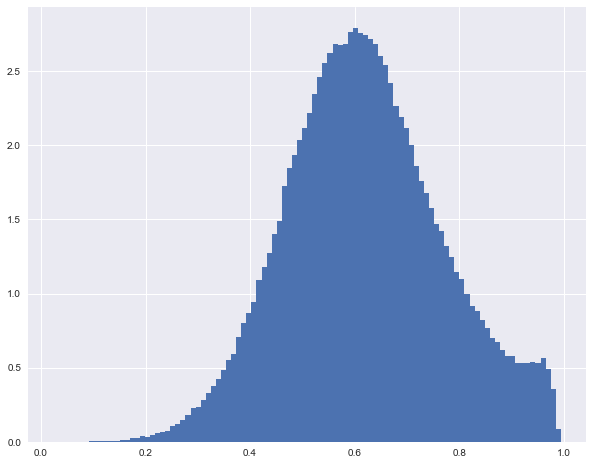

In [25]:
quickstats(db_goodness_of_fit[0])
fig = plt.figure(figsize=(10,8)) # Generates new figure with dimensions (width,height) in inches
ax = fig.add_subplot(1,1,1) # Specfies number of charts in the figure
ax.hist(db_goodness_of_fit, 100, normed=1) # Speficies the number of bins, 100 in that case which will give increments of 0.05


In [35]:
## Isolating the right part of the curve with a high R2 filter

db_goodness_of_fit = np.array(db_goodness_of_fit).flatten() # Flattens the array after converting to a numpy array
db_high_R2_filter = db_goodness_of_fit >= 0.62
print('number of pixels above the mean', np.shape(db_goodness_of_fit[db_high_R2_filter]))

number of pixels above the mean (233937,)


In [38]:
np.shape(db_goodness_of_fit[db_high_R2_filter])[0]

233937

Our distribution has a slight positive skew and a mean of 0.61 which means that on average our regressions tend to have higher explanatory power. However the kurtosis is way below the '3' of the standard normal guassian curve, possibly a result of our limited sample size as well as the 64bits decimalisation of the data.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>d. Processing data from the regression analysis: Extracting pvalues based on the high_R2_filter</p>

Please note:

* the cut of threshold of the R2 value above 0.62 is arbitrary and linked to our limited sample size. With more data, a more stringent constrain could have been applied with R2 values above 0.85 for instance.
* because the regression was unconstrained, some of the coefficient ended up as slight negative value, in this framework, we are trying to verify the presence and not the absence of specific minerals. From that perspective we will exclude negative regression coefficients.

In [32]:
## Selecting relevant pixels and extracting pvalues per mineral, extracting lat and lon

    # Extracting minerals pvalues and storing information in variables
    
client = Monary()
db_olivine_pvalue, db_olivine_lon, db_olivine_lat = client.query("m3", "spectral_collection",
                    {'is_relevant': 1, 'regression.goodness_of_fit': {"$gt": 0.619}, 'regression.olivine.coefficient': {"$gt": 0}},
                    ["regression.olivine.pvalue", "location.lon", "location.lat"],
                    ["float64", "float64", "float64"])

client = Monary()
db_opx_pvalue, db_opx_lon, db_opx_lat = client.query("m3", "spectral_collection",
                    {'is_relevant': 1, 'regression.goodness_of_fit': {"$gt": 0.619}, 'regression.orthopyroxene.coefficient': {"$gt": 0}},
                    ["regression.orthopyroxene.pvalue", "location.lon", "location.lat"],
                    ["float64", "float64", "float64"])

client = Monary()
db_cpx_pvalue, db_cpx_lon, db_cpx_lat = client.query("m3", "spectral_collection",
                    {'is_relevant': 1, 'regression.goodness_of_fit': {"$gt": 0.619}, 'regression.clinopyroxene.coefficient': {"$gt": 0}},
                    ["regression.clinopyroxene.pvalue", "location.lon", "location.lat"],
                    ["float64", "float64", "float64"])

client = Monary()
db_plagioclase_pvalue, db_plagioclase_lon, db_plagioclase_lat = client.query("m3", "spectral_collection",
                    {'is_relevant': 1, 'regression.goodness_of_fit': {"$gt": 0.619}, 'regression.plagioclase.coefficient': {"$gt": 0}},
                    ["regression.plagioclase.pvalue", "location.lon", "location.lat"],
                    ["float64", "float64", "float64"])
    

Overall olivine sample size 210953 pixels with R2 > 0.619 and a positive regression coefficient
Overall opx sample size 207755 pixels with R2 > 0.619 and a positive regression coefficient
Overall cpx sample size 214305 pixels with R2 > 0.619 and a positive regression coefficient
Overall plagioclase sample size 85529 pixels with R2 > 0.619 and a positive regression coefficient
Total pixels population valid for analysis 233937

Statistical significance @ 95pct confidence interval (2Stdev) i.e. a pvalue lower than 0.05

Percentage of Statistically significant olivine 61.4917691515237
Percentage of Statistically significant opx 40.25143521546399
Percentage of Statistically significant cpx 72.37290381598464
Percentage of Statistically significant plagioclase 10.622090562843843


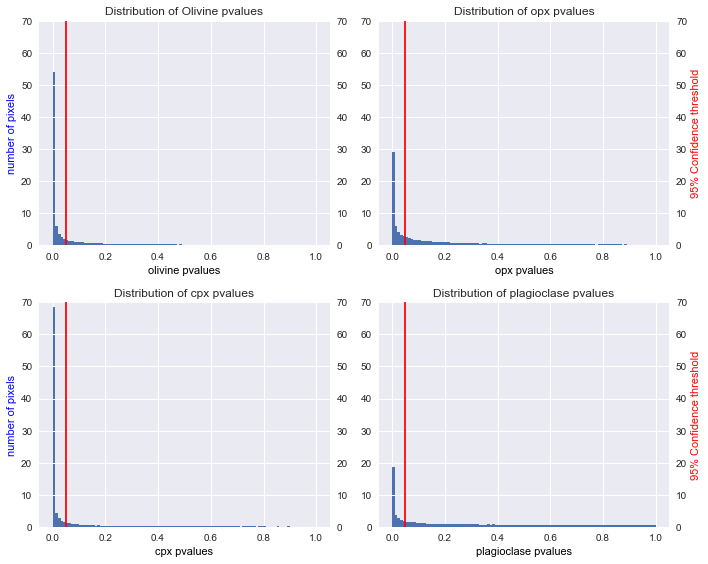

In [41]:
## Ploting distribution of pvalues for the four minerals from spectra with R2 > 0.619

    # Generates new figure with dimensions (width,height) in inches

fig = plt.figure(figsize=(10,8))
 
    # Generates line marking the 95% confidence threshold (2 Standard Deviations)
    
y_test = np.linspace(0,70,71) # Y coordinates of the line
x_test = np.linspace(0.05,0.05,71) # X coordinates of the line
    
    # Generates orthopyroxene graph
    
ax = fig.add_subplot(2,2,1) #Specfies number of charts in the figure - here chart 1 from 2 columns and 2 rows
ax.hist(db_olivine_pvalue, 100, normed=1) # Plots histogram over 100 bins
ax2 = ax.twinx() # Adds secondary Y axis
ax.set_ylim([0,70]) # Scales Y axes to have same dimensions
ax2.set_ylim([0,70]) #Scales Y axes to have same dimensions
ax.set_xlabel("olivine pvalues",fontsize=11,color='black') # Labels x axis
ax.set_ylabel("number of pixels",fontsize=11,color='blue') # Labels y axis
ax.set_title("Distribution of Olivine pvalues") # Labels chart
ax2.plot(x_test, y_test, c='r') # Plots 95% confidence line

    # Generates olivine graph

ax = fig.add_subplot(2,2,2)
ax.hist(db_opx_pvalue, 100, normed=1)
ax2 = ax.twinx() # Adds secondary axis
ax.set_ylim([0,70])
ax2.set_ylim([0,70])
ax.set_xlabel("opx pvalues",fontsize=11,color='black') # Labels x axis
ax2.set_ylabel("95% Confidence threshold",fontsize=11,color='red')
#ax2.set_ylabel("Pixel Spectral curve withiout continuum",fontsize=11,color='blue') # Labels right X axis
ax.set_title("Distribution of opx pvalues")
ax2.plot(x_test, y_test, c='r') # Plots raw pixel extracted from the cube with continuum removed

    # Generates plagioclase graph

ax = fig.add_subplot(2,2,3)
ax.hist(db_cpx_pvalue, 100, normed=1)
ax2 = ax.twinx() # Adds secondary axis
ax.set_ylim([0,70])
ax2.set_ylim([0,70])
ax.set_xlabel("cpx pvalues",fontsize=11,color='black') # Labels x axis
ax.set_ylabel("number of pixels",fontsize=11,color='blue')
#ax2.set_ylabel("Pixel Spectral curve withiout continuum",fontsize=11,color='blue') # Labels right X axis
ax.set_title("Distribution of cpx pvalues")
ax2.plot(x_test, y_test, c='r') # Plots raw pixel extracted from the cube with continuum removed

    # Generates clinopyroxene graph
    
ax = fig.add_subplot(2,2,4)
ax.hist(db_plagioclase_pvalue, 100, normed=1)
ax2 = ax.twinx() # Adds secondary axis
ax.set_ylim([0,70])
ax2.set_ylim([0,70])
ax.set_xlabel("plagioclase pvalues",fontsize=11,color='black') # Labels x axis
ax2.set_ylabel("95% Confidence threshold",fontsize=11,color='red')
#ax2.set_ylabel("Pixel Spectral curve withiout continuum",fontsize=11,color='blue') # Labels right X axis
ax.set_title("Distribution of plagioclase pvalues")
ax2.plot(x_test, y_test, c='r') # Plots raw pixel extracted from the cube with continuum removed

plt.tight_layout()

print('Overall olivine sample size', np.shape(db_olivine_pvalue)[0], 'pixels with R2 > 0.619 and a positive regression coefficient')
print('Overall opx sample size', np.shape(db_opx_pvalue)[0], 'pixels with R2 > 0.619 and a positive regression coefficient')
print('Overall cpx sample size', np.shape(db_cpx_pvalue)[0], 'pixels with R2 > 0.619 and a positive regression coefficient')
print('Overall plagioclase sample size', np.shape(db_plagioclase_pvalue)[0], 'pixels with R2 > 0.619 and a positive regression coefficient')
print('Total pixels population valid for analysis', np.shape(db_goodness_of_fit[db_high_R2_filter])[0])
print()
print('Statistical significance @ 95pct confidence interval (2Stdev) i.e. a pvalue lower than 0.05')
print()
print('Percentage of Statistically significant olivine', np.shape(db_olivine_pvalue[db_olivine_pvalue < 0.05])[0]/np.shape(db_goodness_of_fit[db_high_R2_filter])[0]*100)
print('Percentage of Statistically significant opx',  np.shape(db_opx_pvalue[db_opx_pvalue < 0.05])[0]/np.shape(db_goodness_of_fit[db_high_R2_filter])[0]*100)
print('Percentage of Statistically significant cpx',  np.shape(db_cpx_pvalue[db_cpx_pvalue < 0.05])[0]/np.shape(db_goodness_of_fit[db_high_R2_filter])[0]*100)
print('Percentage of Statistically significant plagioclase',  np.shape(db_plagioclase_pvalue[db_plagioclase_pvalue < 0.05])[0]/np.shape(db_goodness_of_fit[db_high_R2_filter])[0]*100)


Based on the above analysis, the two most abudant minerals in the region of interest are clinopyroxene and olivine. Orthopyroxene and Plagioclase are less abudant to some extent. In the clase of plagioclase, this makes sense given we are looking at a basalitic unit. As we are trying to construct a visual representation of mineral presence accross the lunar surface for hypothesized lava flows we hence propose constructing a raster image with the following characteristics:

* **Red Channel** : Olivine
* **Green Channel** : Clinopyroxene
* **Blue Channel**: Orthopyroxene

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold"><br>e. Raster preparation: Getting dimensions of the image and of the region of interest</p>

* To get the raster dimensions we first need both the latitude and longitude of each pixel as well as their position in the matrix in terms of coordinates of rows and colums.
* In the prior step we have already extracted lat/lon for each pixel based on our set of search filters.
* We now need to exctract the position of the pixels on the grid. Unfortunately our data structure stores pixel position as an array and we have already mentioned that arrays are quite slow to querry.
* The below code which applies to clinopyroxene should be applied to all minerals: in this case because of the length of time required to querry the database as well as the limited amount of RAM of our workstation we have run each querry separatly and exported the results to .csv
* We then reloaded the csvs in the notebook - a process less than optimal which can be solved by avoiding storying arrays as well as making point querries with Monary rather than PyMongo

In [46]:
from bson import json_util
from pandas.io.json import json_normalize

# Connecting the database and reaching the 'spectral_collection_test' collection

client = MongoClient('mongodb://localhost:27017/')
db = client['m3']
collection = db['spectral_collection']

# Projection Example : Returning values only from specific fields within the document

cursor = collection.find(
    {'is_relevant': 1, 'regression.goodness_of_fit': {"$gt": 0.619}, 'regression.clinopyroxene.coefficient': {"$gt": 0}},
    {'pixel_name':1, '_id': 0})

# Converts JSON output from the database querry into usable pandas DataFrame

data_conversion = json.loads(json_util.dumps(cursor))
data_conversion = json_normalize(data_conversion)

# Unstacks the data

data_conversion = data_conversion['pixel_name'].apply(pd.Series).stack()
data_conversion = data_conversion.apply(pd.Series).unstack()

# Cleans indexes and export to csv file

data_conversion.columns = data_conversion.columns.droplevel()
data_conversion.to_csv('cpx_pixels.csv', sep=',')
data_conversion.head()

,0,1
0,0,2602
1,0,2604
2,0,2605
3,0,2609
4,0,2610


This rather unelegant scripts merges all pixel coordinates in one dataframe

In [20]:
pixel_coordinates_dataframe_load = pd.read_csv('./Data/cpx_pixels.csv', sep=',')
pixel_coordinates_dataframe = pixel_coordinates_dataframe_load
del pixel_coordinates_dataframe['Unnamed: 0']
pixel_coordinates_dataframe_load = pd.read_csv('./Data/opx_pixels.csv', sep=',')
pixel_coordinates_dataframe['r_opx'] = pixel_coordinates_dataframe_load['r_opx']
pixel_coordinates_dataframe['c_opx'] = pixel_coordinates_dataframe_load['c_opx']
pixel_coordinates_dataframe_load = pd.read_csv('./Data/olivine_pixels.csv', sep=',')
pixel_coordinates_dataframe['r_olivine'] = pixel_coordinates_dataframe_load['r_olivine']
pixel_coordinates_dataframe['c_olivine'] = pixel_coordinates_dataframe_load['c_olivine']


In [42]:
## Gathering dimensions of the Region of Interest (hereafter ROI):Before acheving range analysis on the selected pixels

    # Getting dimensions of the matrix - this will be indicative of the overall image size in pixels

print('Getting dimensions of the matrix:')
print()
print('Opx max row', pixel_coordinates_dataframe['r_opx'].max(), '|', 'Opx min row', pixel_coordinates_dataframe['r_opx'].min())
print('Cpx max row', pixel_coordinates_dataframe['r_cpx'].max(), '|', 'Cpx min row', pixel_coordinates_dataframe['r_cpx'].min())
print('Olivine max row', pixel_coordinates_dataframe['r_olivine'].max(), '|', 'Olivine min row', pixel_coordinates_dataframe['r_olivine'].min())
print()
print('Opx max column',pixel_coordinates_dataframe['c_opx'].max(), '|', 'Opx min column', pixel_coordinates_dataframe['c_opx'].min())
print('Cpx max column', pixel_coordinates_dataframe['c_cpx'].max(), '|', 'Cpx min column', pixel_coordinates_dataframe['c_cpx'].min())
print('Olivine max column', pixel_coordinates_dataframe['c_olivine'].max(), '|', 'Olivne min column', pixel_coordinates_dataframe['c_olivine'].min())
print()
    # Getting dimensions of the ROI

print('Getting dimensions of the ROI:')
print()
print('Max Opx Lon', db_opx_lon.max(), '|', 'Min Opx Lon', db_opx_lon.min()) 
print('Max Cpx Lon', db_cpx_lon.max(), '|', 'Min Cpx Lon', db_cpx_lon.min())
print('Max Olivine Lon', db_olivine_lon.max(), '|', 'Min Olivine Lon', db_olivine_lon.min())
print()
print('Max Opx Lat', db_opx_lat.max(), '|', 'Min Opx Lat', db_opx_lat.min()) 
print('Max Cpx Lat', db_cpx_lat.max(), '|', 'Min Cpx Lat', db_cpx_lat.min())
print('Max Olivine Lat', db_olivine_lat.max(), '|', 'Min Olivine Lat', db_olivine_lat.min())
    


Getting dimensions of the matrix:

Opx max row 68.0 | Opx min row 0.0
Cpx max row 68 | Cpx min row 0
Olivine max row 68.0 | Olivine min row 0.0

Opx max column 9943.0 | Opx min column 2573.0
Cpx max column 9944 | Cpx min column 2573
Olivine max column 9944.0 | Olivne min column 2573.0

Getting dimensions of the ROI:

Max Opx Lon -0.000162885648081 | Min Opx Lon -359.999070723
Max Cpx Lon -0.000162885648081 | Min Cpx Lon -359.999070723
Max Olivine Lon -0.000162885648081 | Min Olivine Lon -359.999070723

Max Opx Lat 57.7719036717 | Min Opx Lat 53.5518095487
Max Cpx Lat 57.7758866265 | Min Cpx Lat 53.5467064189
Max Olivine Lat 57.7758866265 | Min Olivine Lat 53.5467064189


Based on the above it would seem we would need to construct a maxtrix which is 69 x 7371

**We ran out of time but thought of adapting the below code and exporting the raster to QGIS**

In [ ]:
from osgeo import gdal
from osgeo import osr
import numpy as np
import os, sys

#  Initialize the Image Size
image_size = (69,7371)

#  Choose some Geographic Transform (Around Lake Tahoe)
lat = [39,38.5]
lon = [-120,-119.5]

#  Create Each Channel
r_pixels = np.zeros((image_size), dtype=np.uint8)
g_pixels = np.zeros((image_size), dtype=np.uint8)
b_pixels = np.zeros((image_size), dtype=np.uint8)

#  Set the Pixel Data (Create some boxes)
for x in range(0,image_size[0]):
    for y in range(0,image_size[1]):
        if x < image_size[0]/2 and y < image_size[1]/2:
            r_pixels[y,x] = 255
        elif x >= image_size[0]/2 and y < image_size[1]/2:
            g_pixels[y,x] = 255
        elif x < image_size[0]/2 and y >= image_size[1]/2:
            b_pixels[y,x] = 255
        else:
            r_pixels[y,x] = 255
            g_pixels[y,x] = 255
            b_pixels[y,x] = 255

# set geotransform
nx = image_size[0]
ny = image_size[1]
xmin, ymin, xmax, ymax = [min(lon), min(lat), max(lon), max(lat)]
xres = (xmax - xmin) / float(nx)
yres = (ymax - ymin) / float(ny)
geotransform = (xmin, xres, 0, ymax, 0, -yres)

# create the 3-band raster file
dst_ds = gdal.GetDriverByName('GTiff').Create('m3_Imbrium_GeoTIFF.tif', ny, nx, 3, gdal.GDT_Byte)

dst_ds.SetGeoTransform(geotransform)    # specify coords
srs = osr.SpatialReference()            # establish encoding
srs.ImportFromEPSG(3857)                # WGS84 lat/long
dst_ds.SetProjection(srs.ExportToWkt()) # export coords to file
dst_ds.GetRasterBand(1).WriteArray(r_pixels)   # write r-band to the raster
dst_ds.GetRasterBand(2).WriteArray(g_pixels)   # write g-band to the raster
dst_ds.GetRasterBand(3).WriteArray(b_pixels)   # write b-band to the raster
dst_ds.FlushCache()                     # write to disk
dst_ds = None

<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>13. Interaction with QGIS</p>

*For more information on the installation of QGIS under a Python 2.7 environement please refer to section 5 of this notebook.*

**Rationale for using QGIS**

As part of the initial discussion on this very work, it was mentioned that it could be desirable to achieve specific statistical analysis on geological units that were mapped qualitatively via a GIS software. In particular:

* Extract pixels of a specific geological unit, compute statistics to find out an average end member of the unit
* Achieve a similar extraction on other units
* Operate a comparision analysis between end members and eventually classify them with clustering analysis to evidence similarities or differences and hence form views on the mapped geological units.

**Requirements**

* Installation of a Database, in that case MongoDB
* Installation of MongoDB plugins:
    * Load MongoDB layers - Enables QGIS to connect to MongoDB
    * SaveLayer in MongoDB - 
    


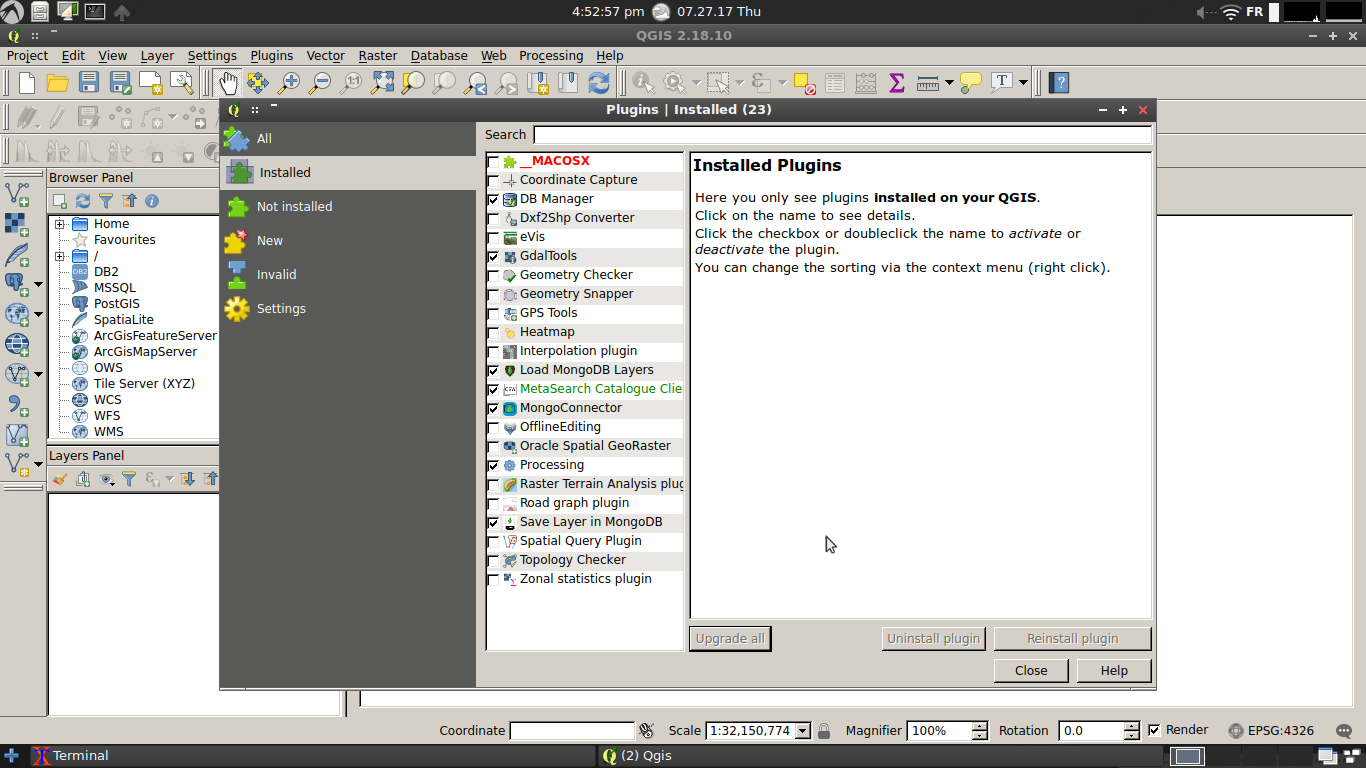

In [6]:
Image('./Pictures/qgis_plugins.png')

**Headwinds**

* We loaded the shapefiles provided in the data pack into QGIS, unfortunately the units were not mapped individually and despite more than 80 units were mapped, the extracted data in MongoDB only sums to 43.
* The absence of ids and geometries for each unit hence
* In theory one could then construct a querry in the database to extract information within a specific region, analysts wishing to learn more about GeoSpatial querries in MongoDB can find out more information @ https://docs.mongodb.com/manual/geospatial-queries/*

**Extraction of information from the shapefile**

* To extract coordinates of the units, analyst should click on the Save Layer in Mongo DB shortcut and specify the database where they want the data to be stored.
* If the database/collection doesn't exist it will be created


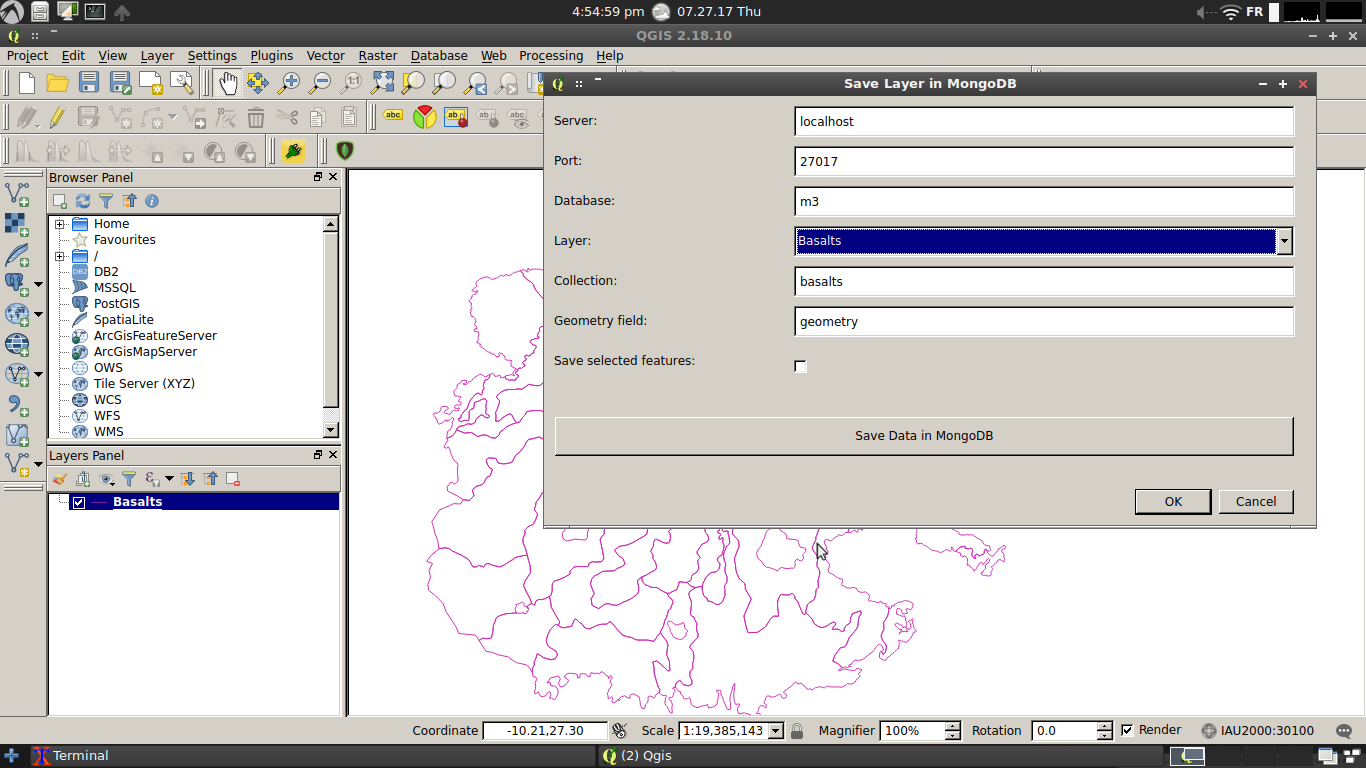

In [8]:
Image('./Pictures/export_shapefile_todatabase.png')

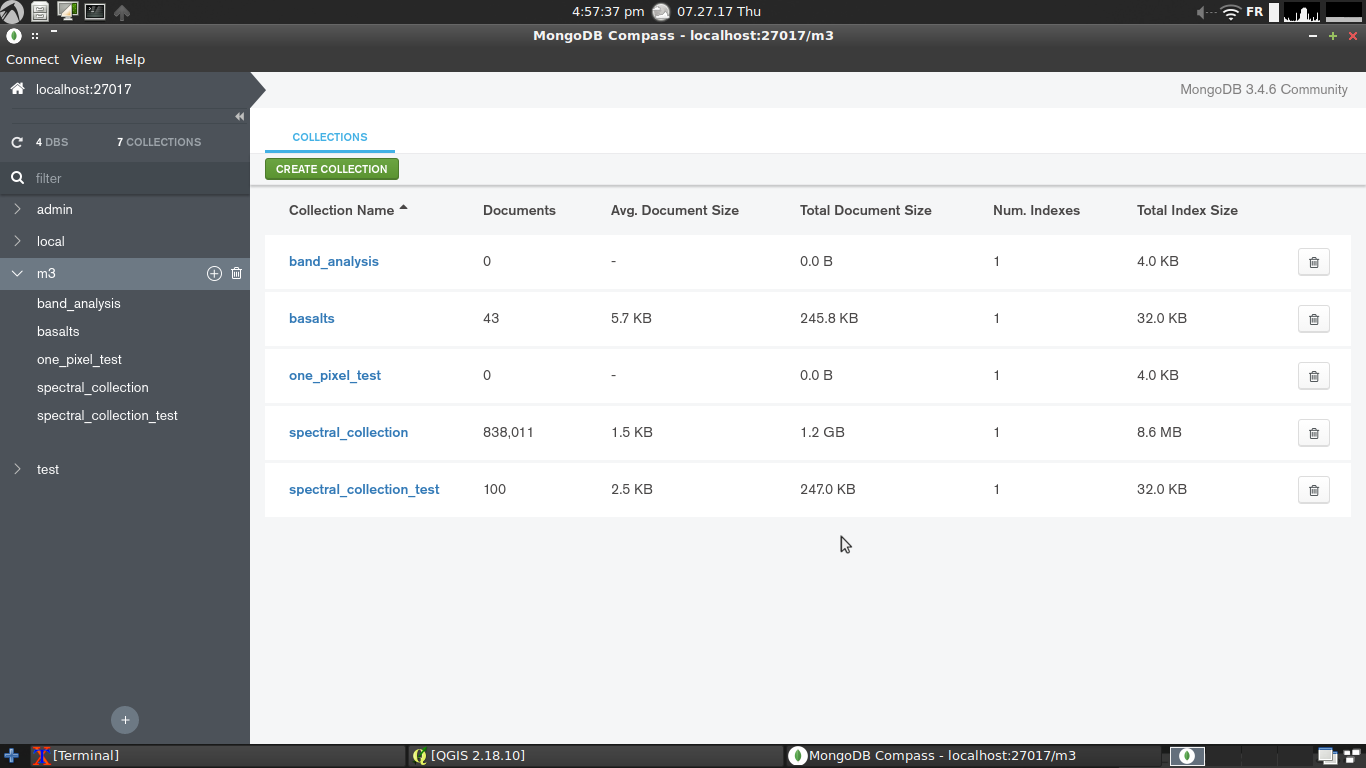

In [7]:
Image('./Pictures/MDB_basalts.png')

The data is stored in GeoJSON format in MongoDB with a line represented as a succession of 2 digit arrays

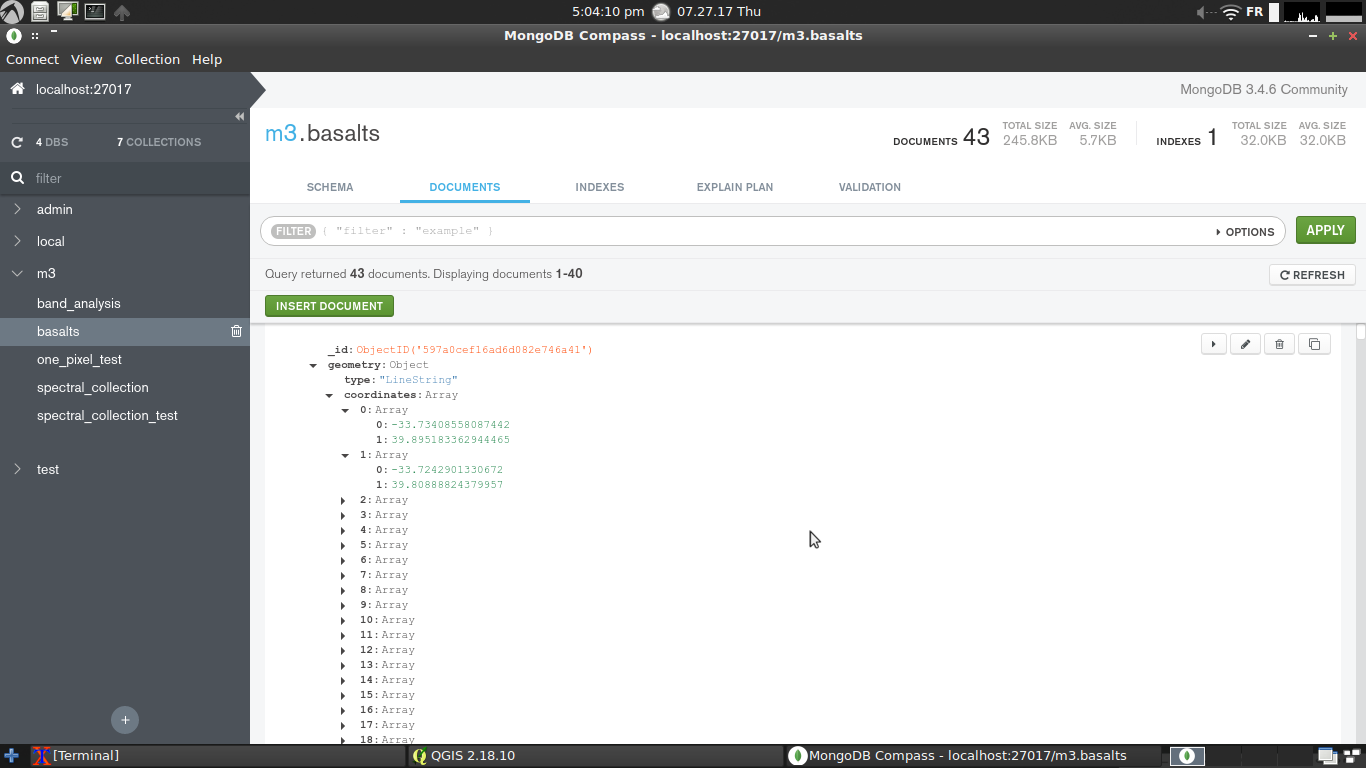

In [9]:
Image('./Pictures/GeoJSON_MDB.png')

<p style="font-family: Arial; font-size:2em;color:#2462C0; font-style:bold"><br>14. Hardware and infrastructure specifications</p>

* MongoDB geospatial queries | https://docs.mongodb.com/manual/geospatial-queries/
* QGIS Installation: http://qgis.org/en/site/forusers/alldownloads.html#debian-ubuntu
    * Adding repositories based on distro in: "/etc/apt/sources.list"
    * Update aptitude: sudo apt-get update
    * Install QGIS


Analysis achieved from 26/06/2017 to the 28/07/2017

* Platform: ACER Aspire V5-123 | AMD Dual-Core E1-2100 | 4 GB DDR3 Memory | 500 GB HDD 
* OS : LXLE, *more info on http://www.lxle.net/*
* Python environement : Anaconda3, *more info on https://www.continuum.io/downloads*, Python Environements: 3.6, 2.7


In [32]:
!cat /proc/version
print()
!lscpu
print()
!lshw -short


Linux version 4.4.0-87-generic (buildd@lcy01-31) (gcc version 5.4.0 20160609 (Ubuntu 5.4.0-6ubuntu1~16.04.4) ) #110-Ubuntu SMP Tue Jul 18 12:55:35 UTC 2017

Architecture:          x86_64
CPU op-mode(s):        32-bit, 64-bit
Byte Order:            Little Endian
CPU(s):                2
On-line CPU(s) list:   0,1
Thread(s) per core:    1
Core(s) per socket:    2
Socket(s):             1
NUMA node(s):          1
Vendor ID:             AuthenticAMD
CPU family:            22
Model:                 0
Model name:            AMD E1-2100 APU with Radeon(TM) HD Graphics
Stepping:              1
CPU MHz:               800.000
CPU max MHz:           1000.0000
CPU min MHz:           800.0000
BogoMIPS:              1996.34
Virtualisation:        AMD-V
L1d cache:             32K
L1i cache:             32K
L2 cache:              1024K
NUMA node0 CPU(s):     0,1
Flags:                 fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ht syscall nx mmxext